# Analytics

#### Date: 2021/01

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: SysArq

##### Semester: 2021/01
##### Professor: Hilmer Neri

##### Members:
- Gabriel Davi Silva Pereira
- Micaella Lorraine Gouveia de Lima
- Pedro Igor Oliveira Silva
- Sofia Costa Patrocínio

### LIBRARIES

In [249]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime
from datetime import datetime

### GRAPH SETTINGS

In [245]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [250]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [251]:
jsons = glob('../analytics-raw-data/*.json') # add the path here
TeamRegex = r"Multilind_(.*?)-(.*?).json"

In [252]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(TeamRegex, expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [253]:
base_component_df = create_base_component_df(jsons)

In [254]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
120,duplicated_lines_density,0.0,True,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
121,functions,36,NaN,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
122,security_rating,1.0,True,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
123,files,36,NaN,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
124,complexity,50,NaN,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
125,ncloc,451,NaN,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
126,reliability_rating,1.0,True,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
127,comment_lines_density,0.2,False,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
128,duplicated_lines_density,0.0,True,fga-eps-mds-2021_1-Multilind_Admin-2021-11-04-...,Admin,2021-11-04-00.35
129,functions,82,NaN,fga-eps-mds-2021_1-Multilind_Admin-2021-11-04-...,Admin,2021-11-04-00.35


#### Create dataframe per file

In [255]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [256]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(TeamRegex, expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [257]:
file_component_df = create_file_df(jsons)

In [258]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
628,src/App.js,3,4,0.0,0.0,NaN,31,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
629,src/config/auth-api.js,0,0,0.0,0.0,NaN,7,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
630,src/helpers/auth-helper.js,1,1,0.0,0.0,NaN,6,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
631,src/context/authContext.js,3,3,5.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
632,src/services/authService.js,4,4,0.0,0.0,NaN,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
633,src/config/content-api.js,0,0,0.0,0.0,NaN,7,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
634,src/index.js,0,0,0.0,0.0,NaN,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
635,src/pages/index.js,0,0,0.0,0.0,NaN,2,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
636,src/pages/Login/index.js,4,6,0.0,0.0,NaN,62,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33
637,src/pages/Home/index.js,1,1,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-Multilind_Admin-2021-10-18-...,Admin,2021-10-18-01.33


#### Create dataframe per repository

In [273]:
Admin_df = file_component_df[file_component_df['repository'] == 'Admin']
Content_df = file_component_df[file_component_df['repository'] == 'Content']
Files_df = file_component_df[file_component_df['repository'] == 'Files']
Mobile_App_df = file_component_df[file_component_df['repository'] == 'Mobile_App']
User_App_df = file_component_df[file_component_df['repository'] == 'User']

print(len(Admin_df.index))

70


### Metric calculations

##### COMPLEXITY

In [274]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [275]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [306]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### Calculate m1, m2 and m3 for each repository

In [307]:
def create_metrics_df(df):
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    for version in version_vec:
        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [308]:
Admin_metrics = create_metrics_df(Admin_df)
Content_metrics = create_metrics_df(Content_df)
Files_metrics = create_metrics_df(Files_df)
User_App_metrics = create_metrics_df(User_App_df)
Mobile_App_metrics = create_metrics_df(Mobile_App_df)

### Data visualization

- You must do this for each of your repositories

# Files

## M1

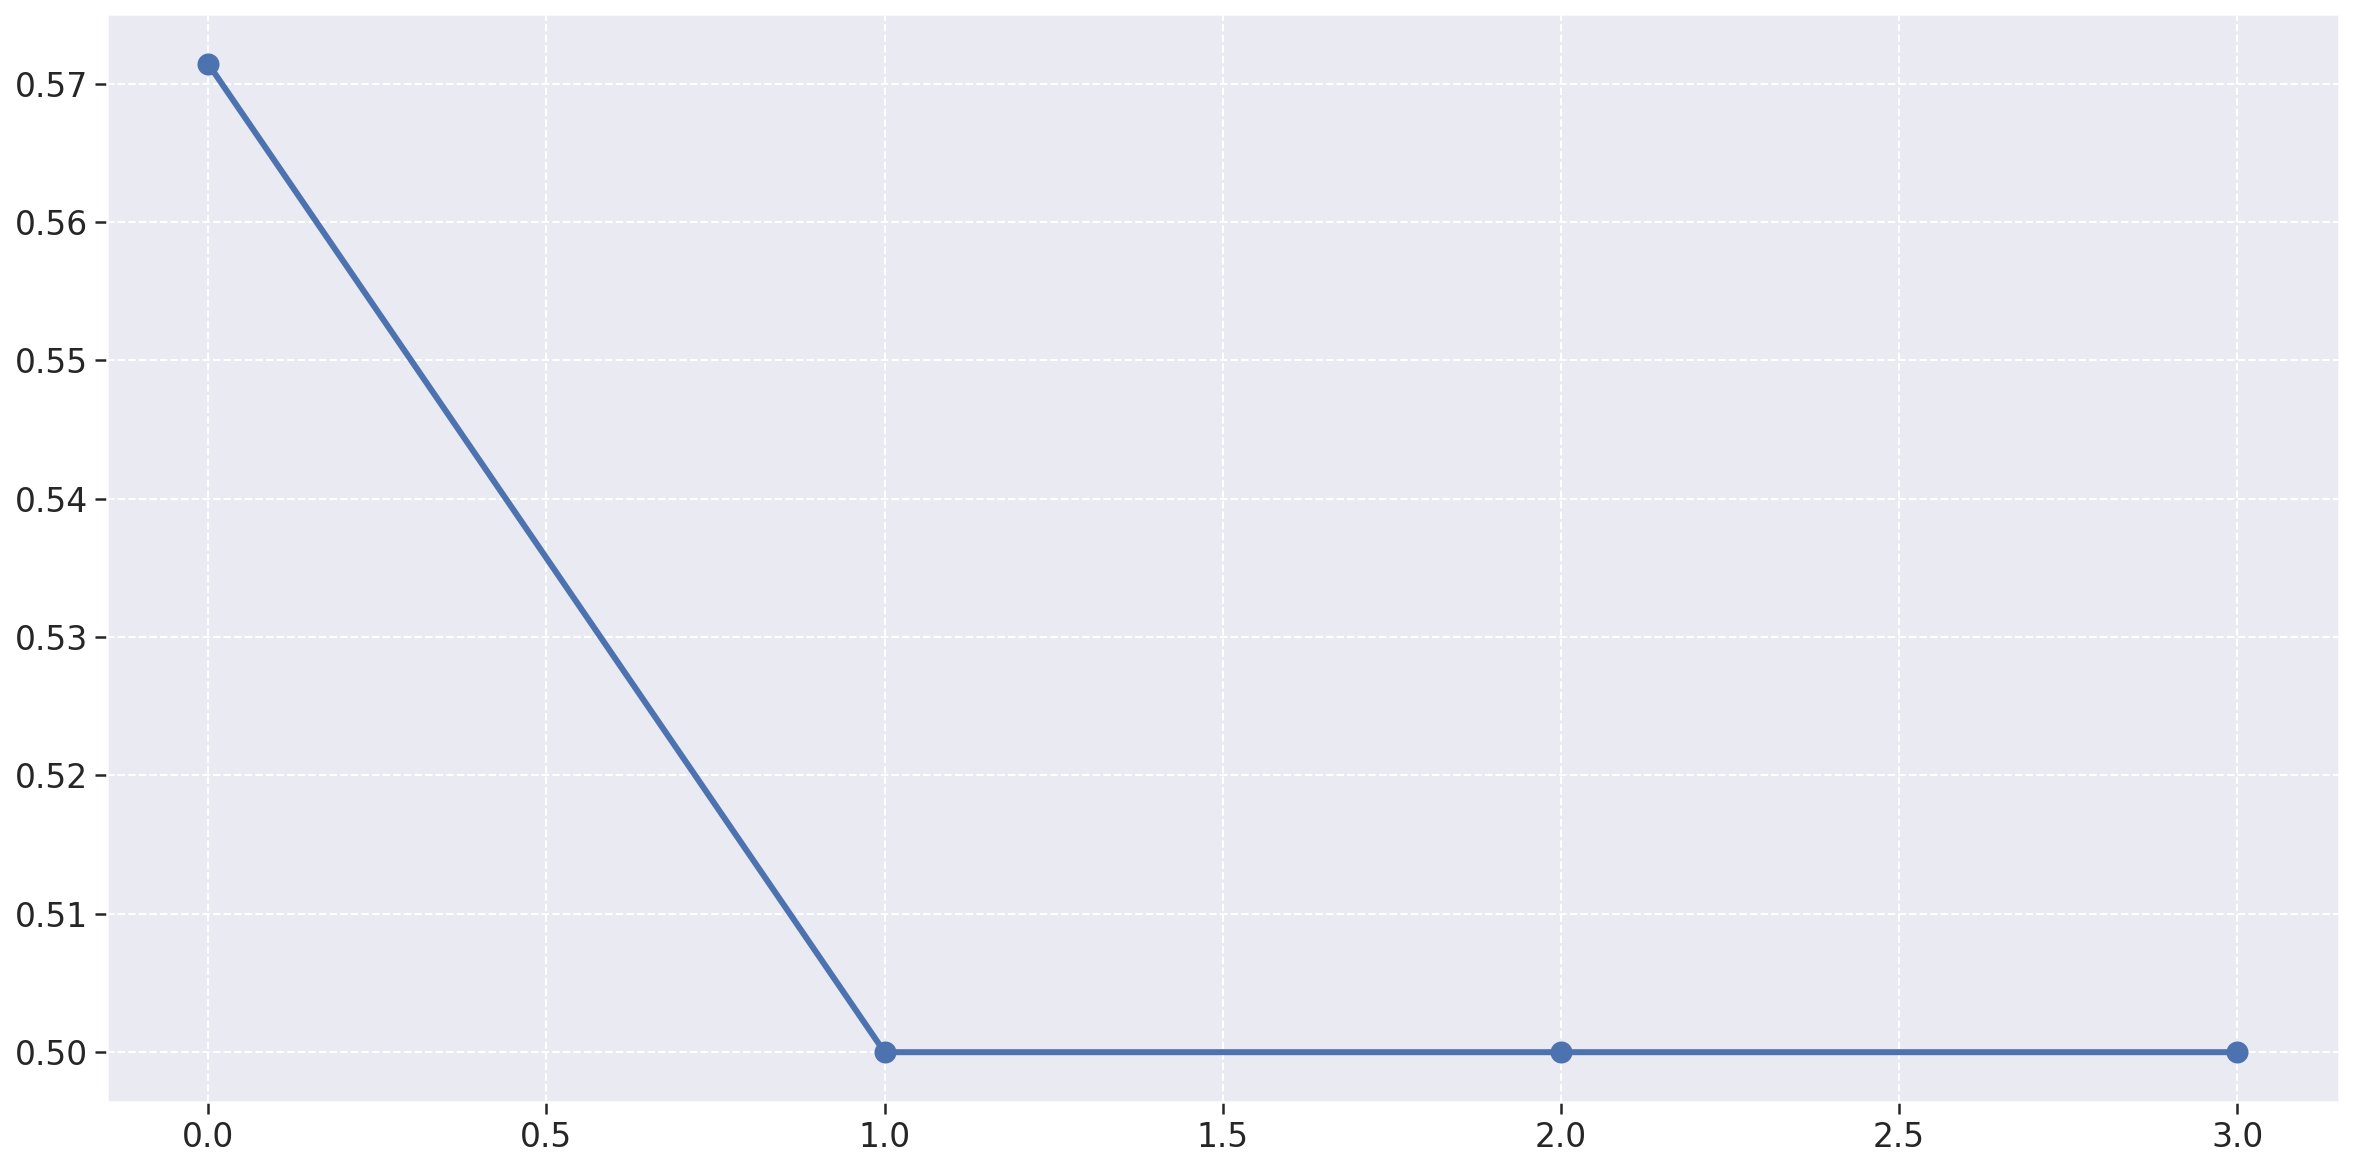

In [309]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Files_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

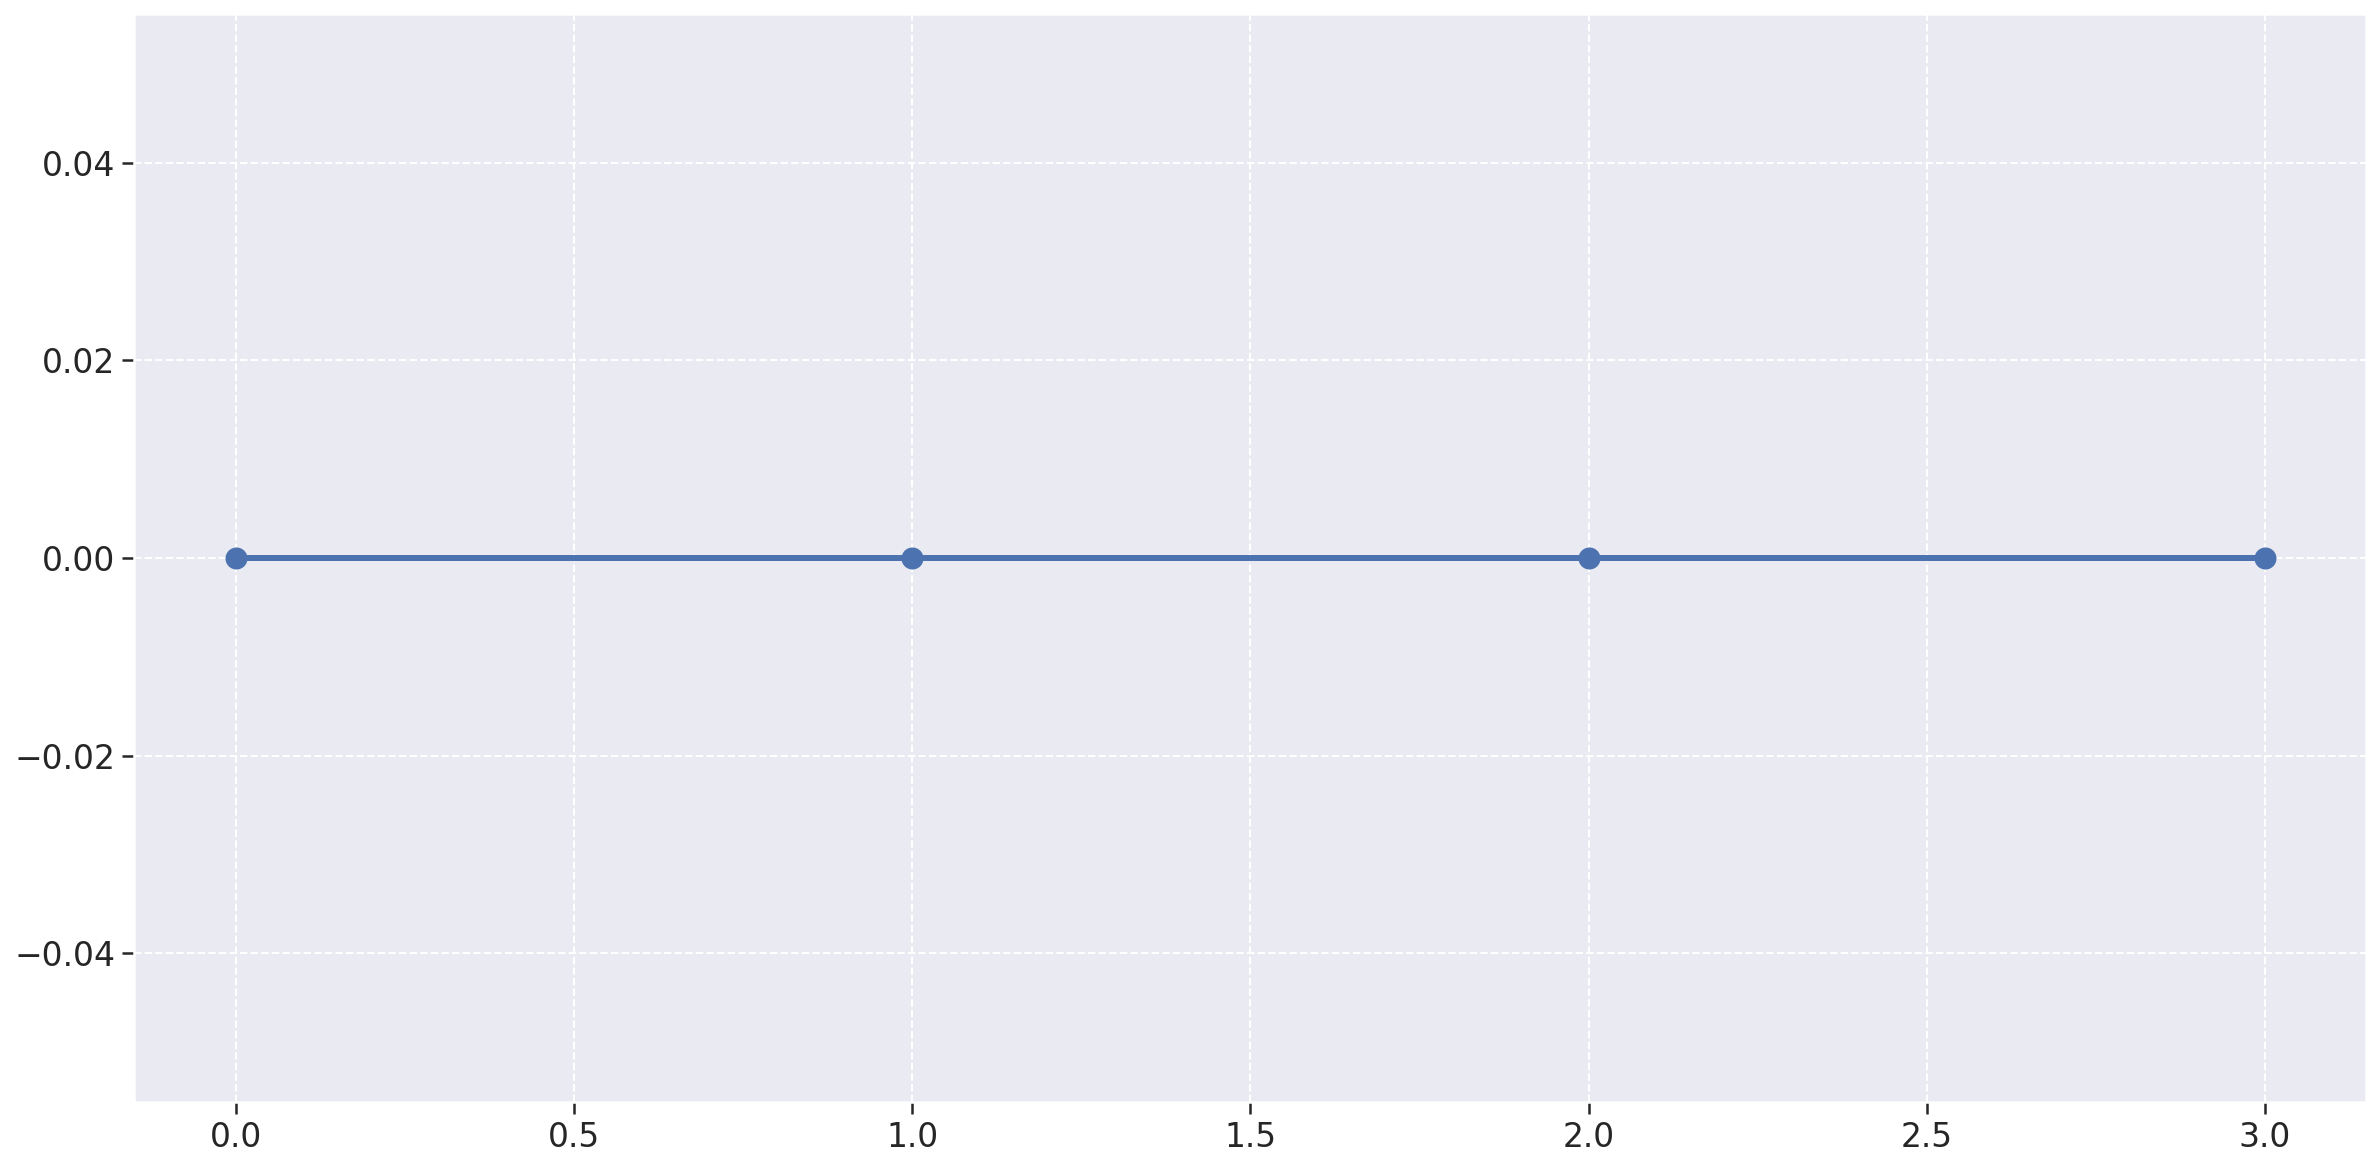

In [310]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Files_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

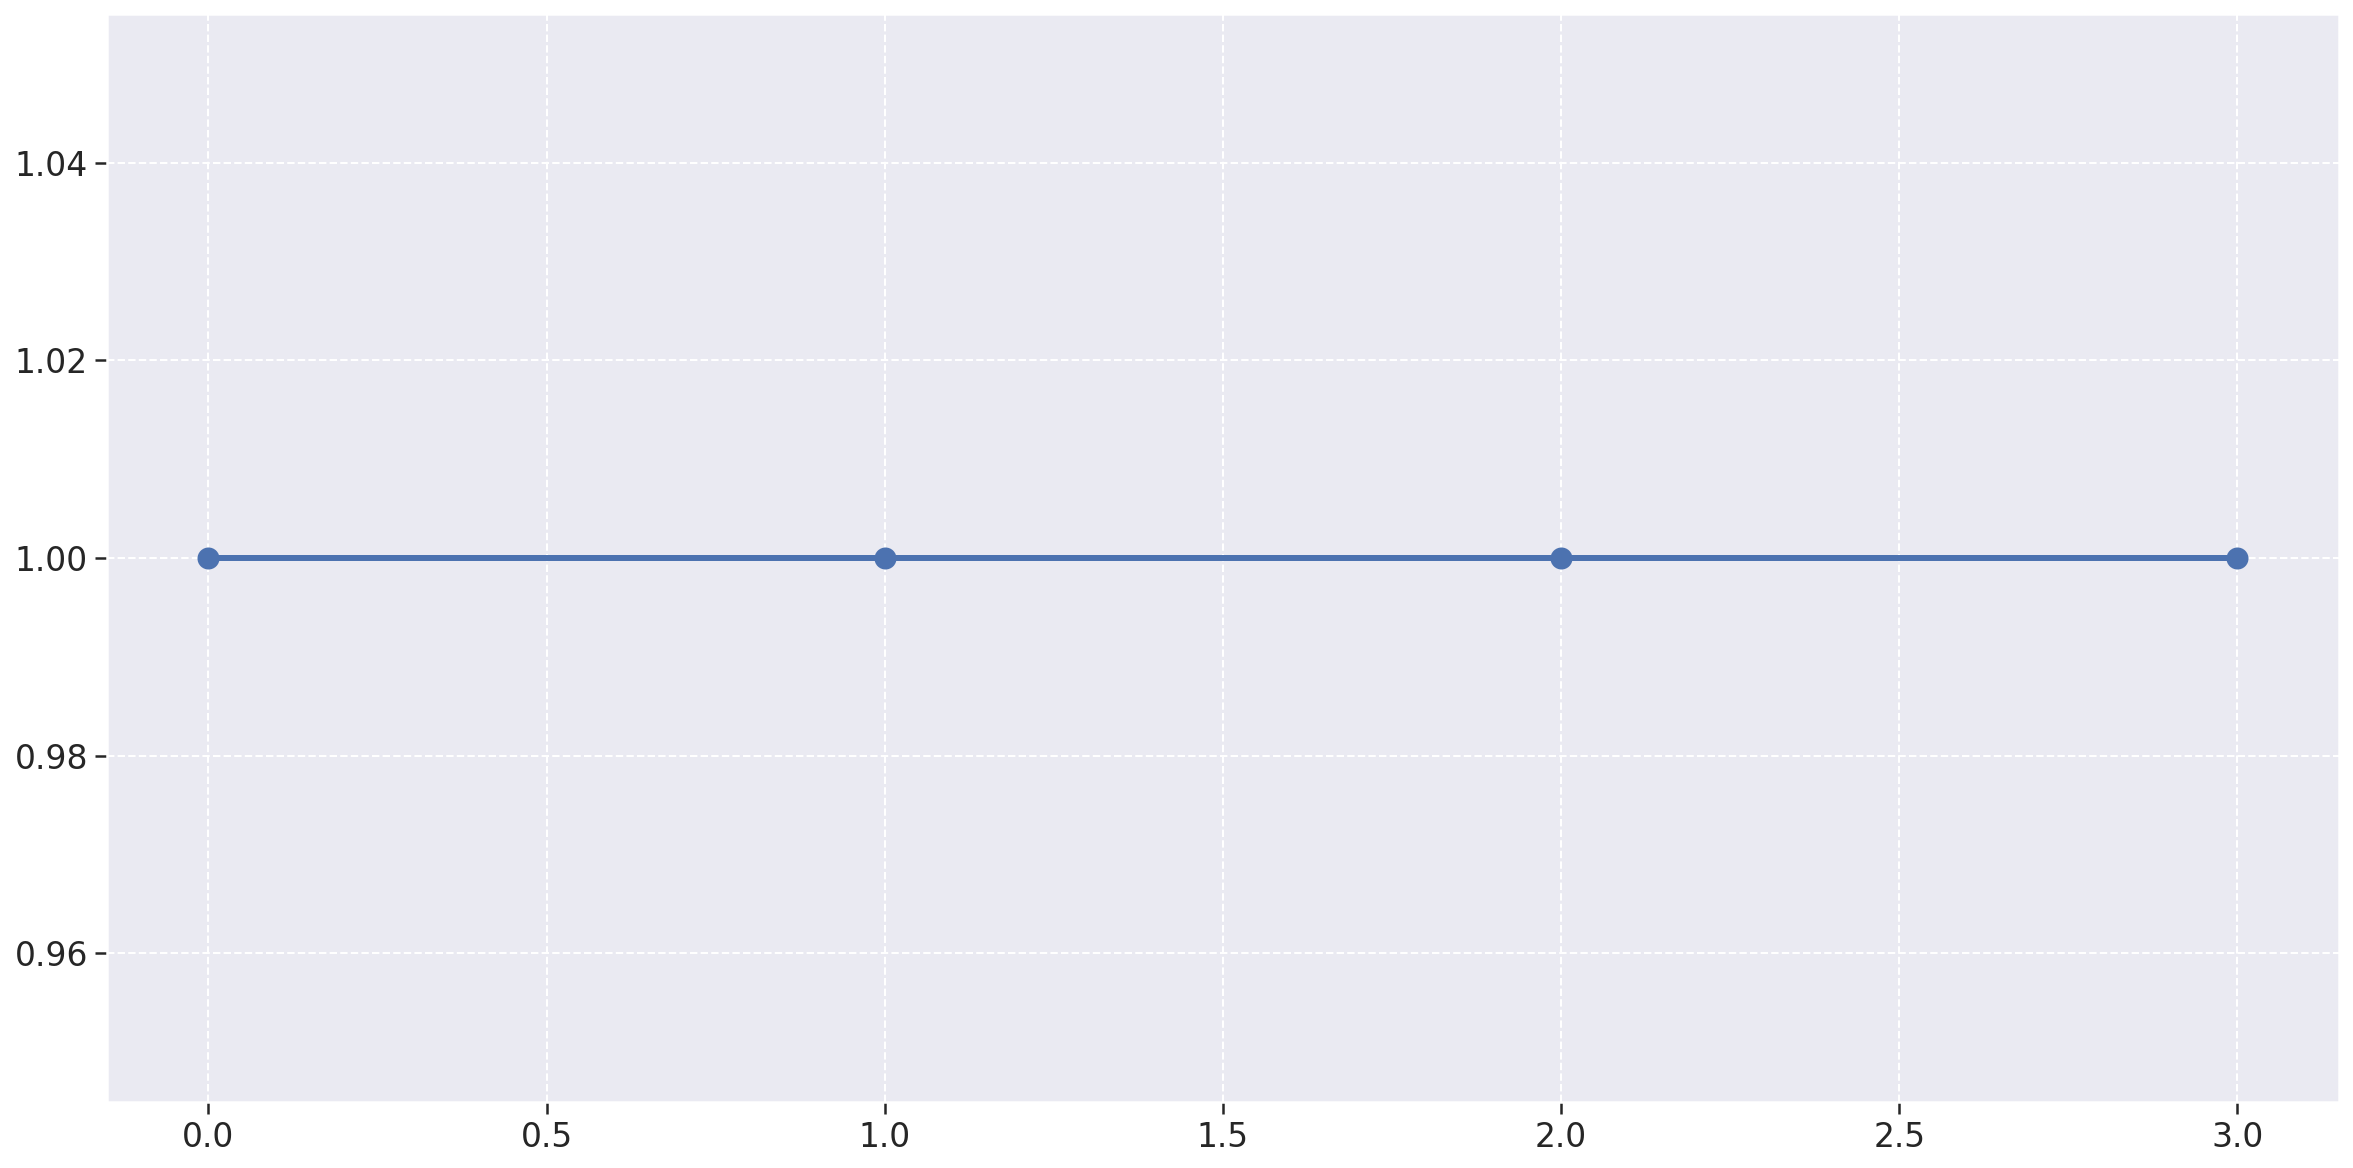

In [311]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Files_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

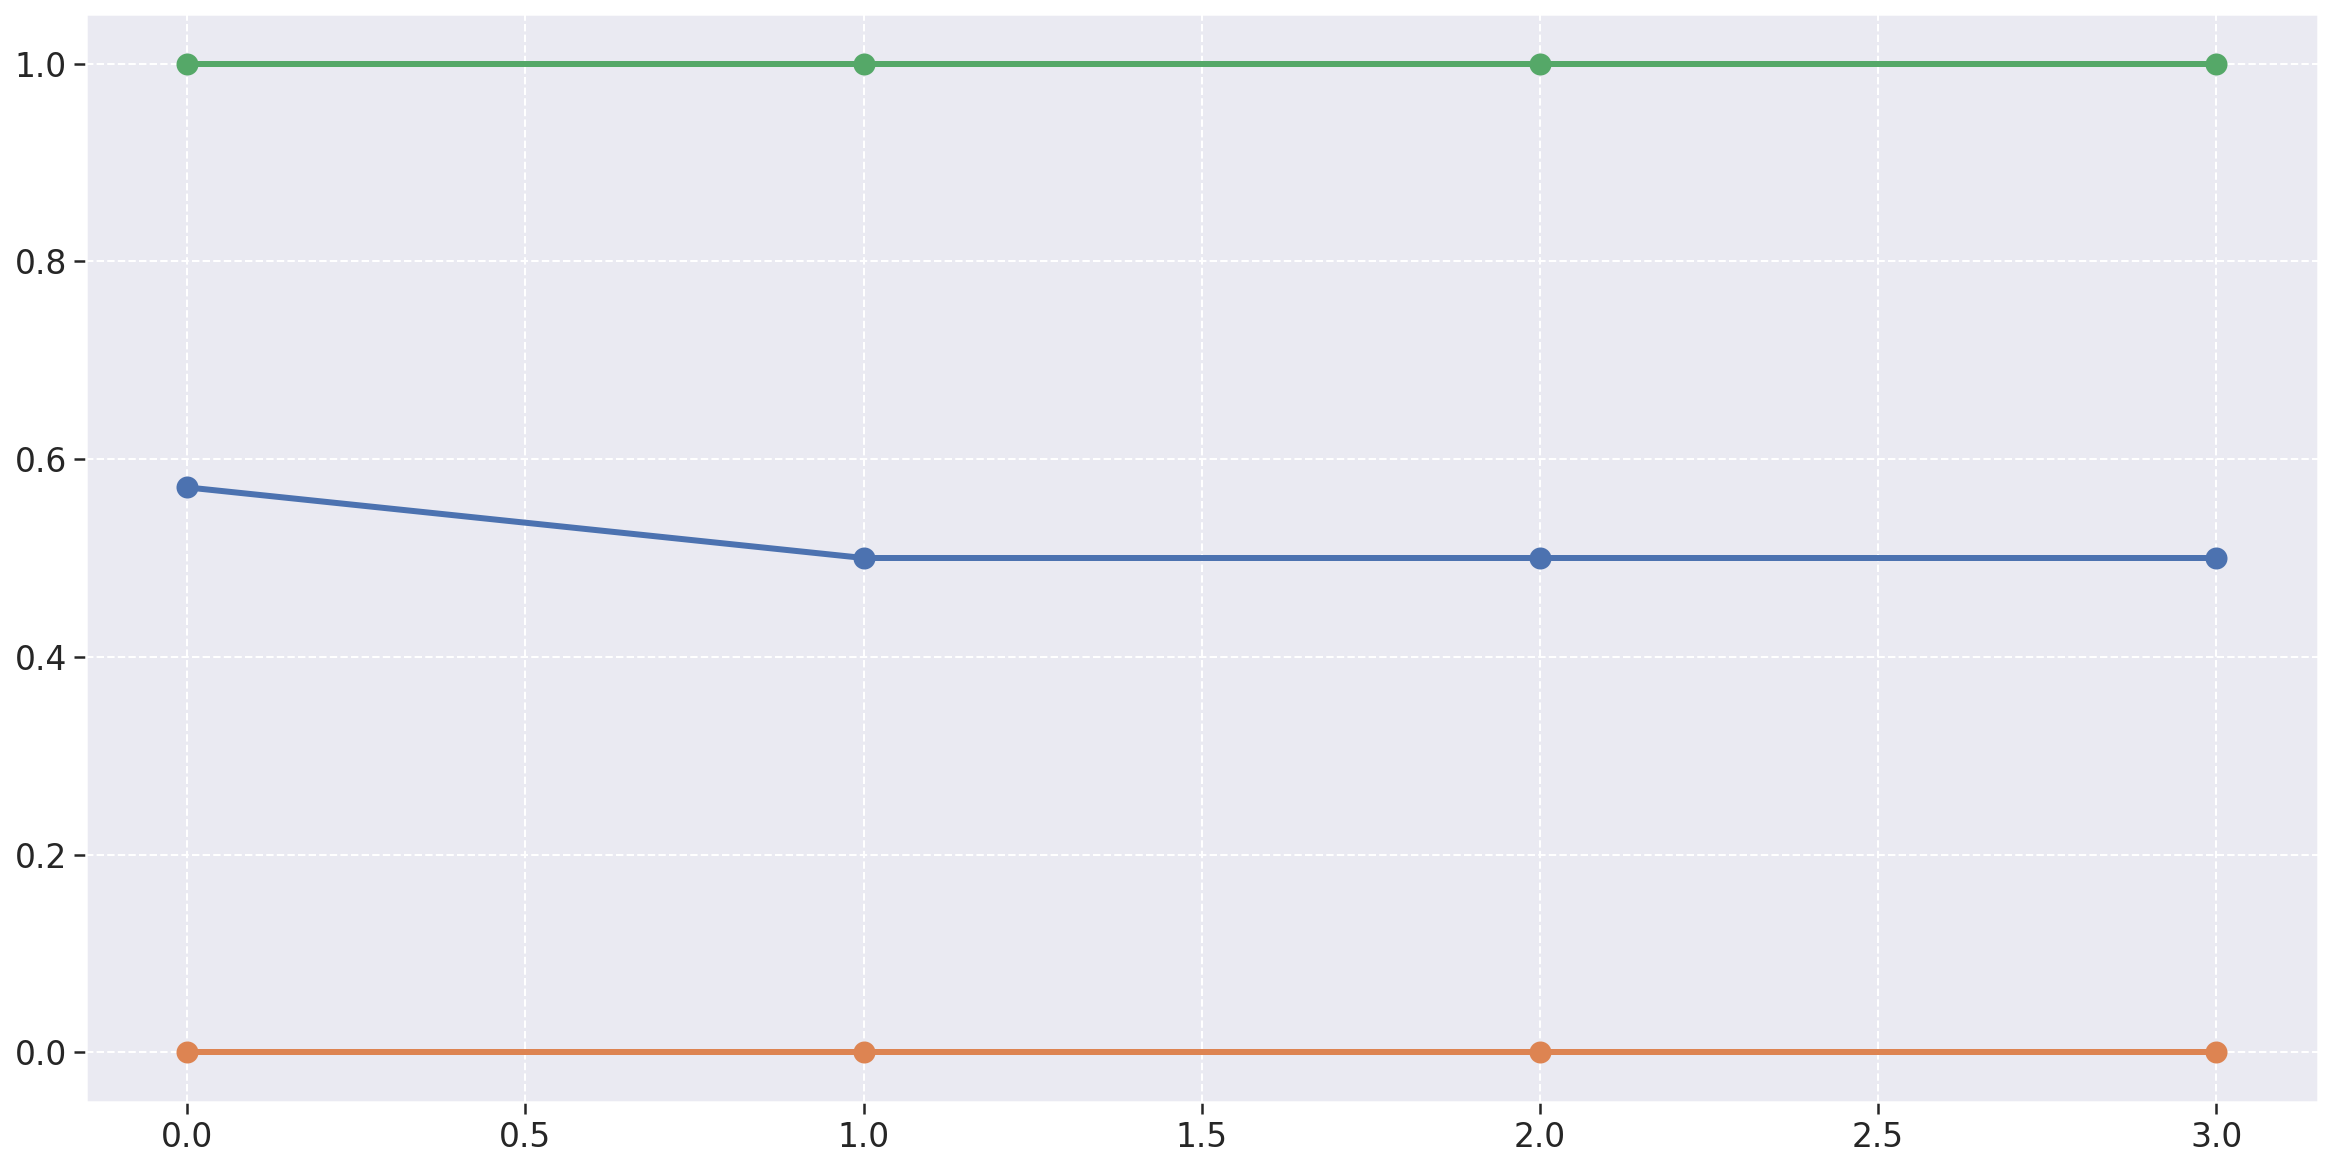

In [313]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Files_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(Files_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(Files_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Admin

## M1

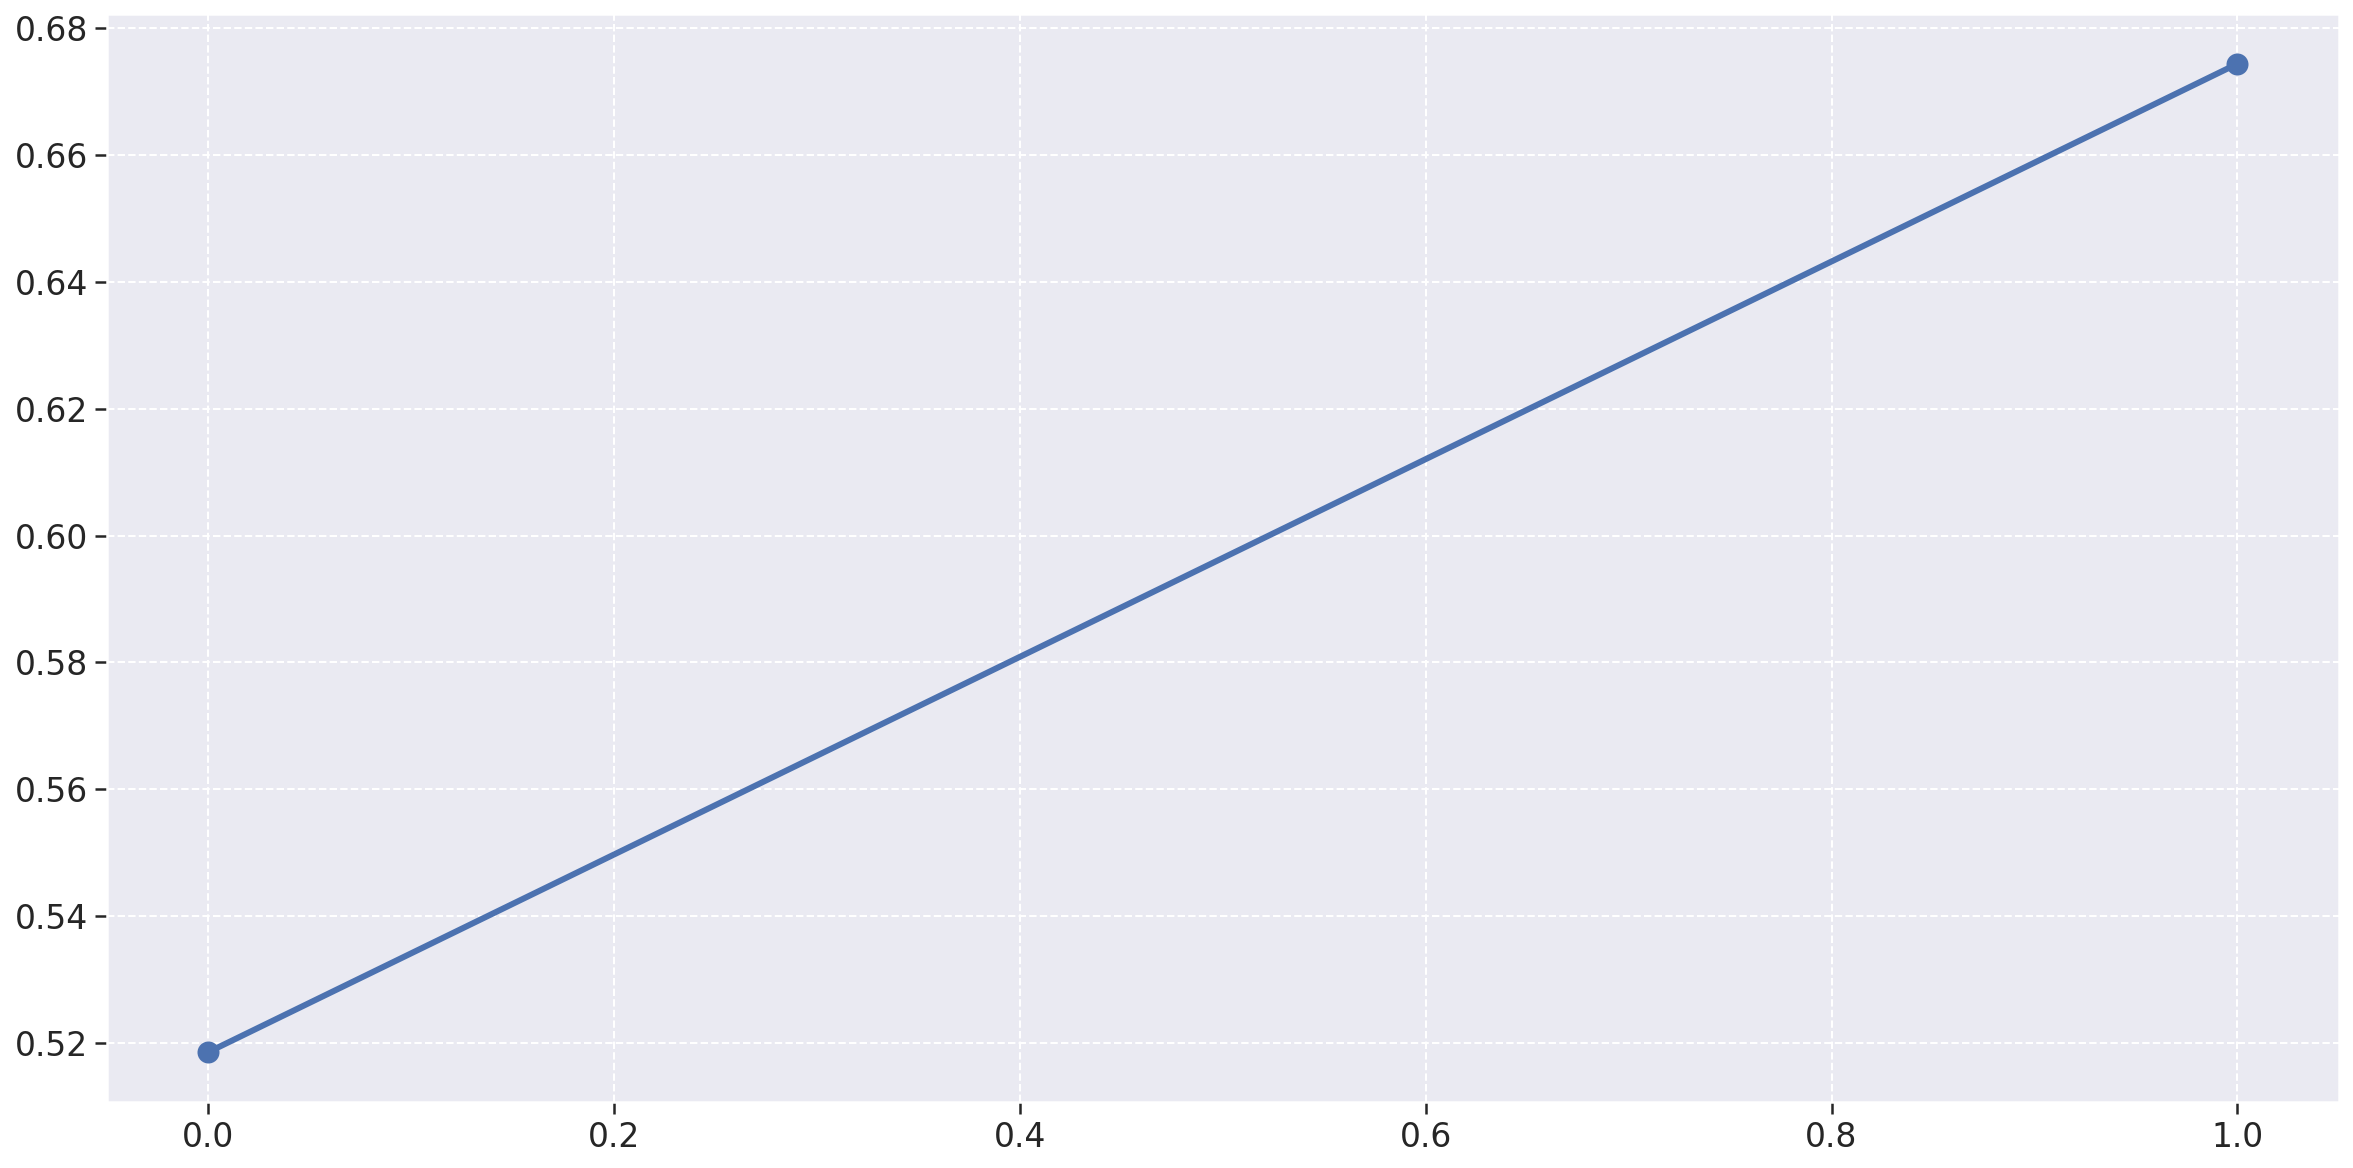

In [314]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Admin_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

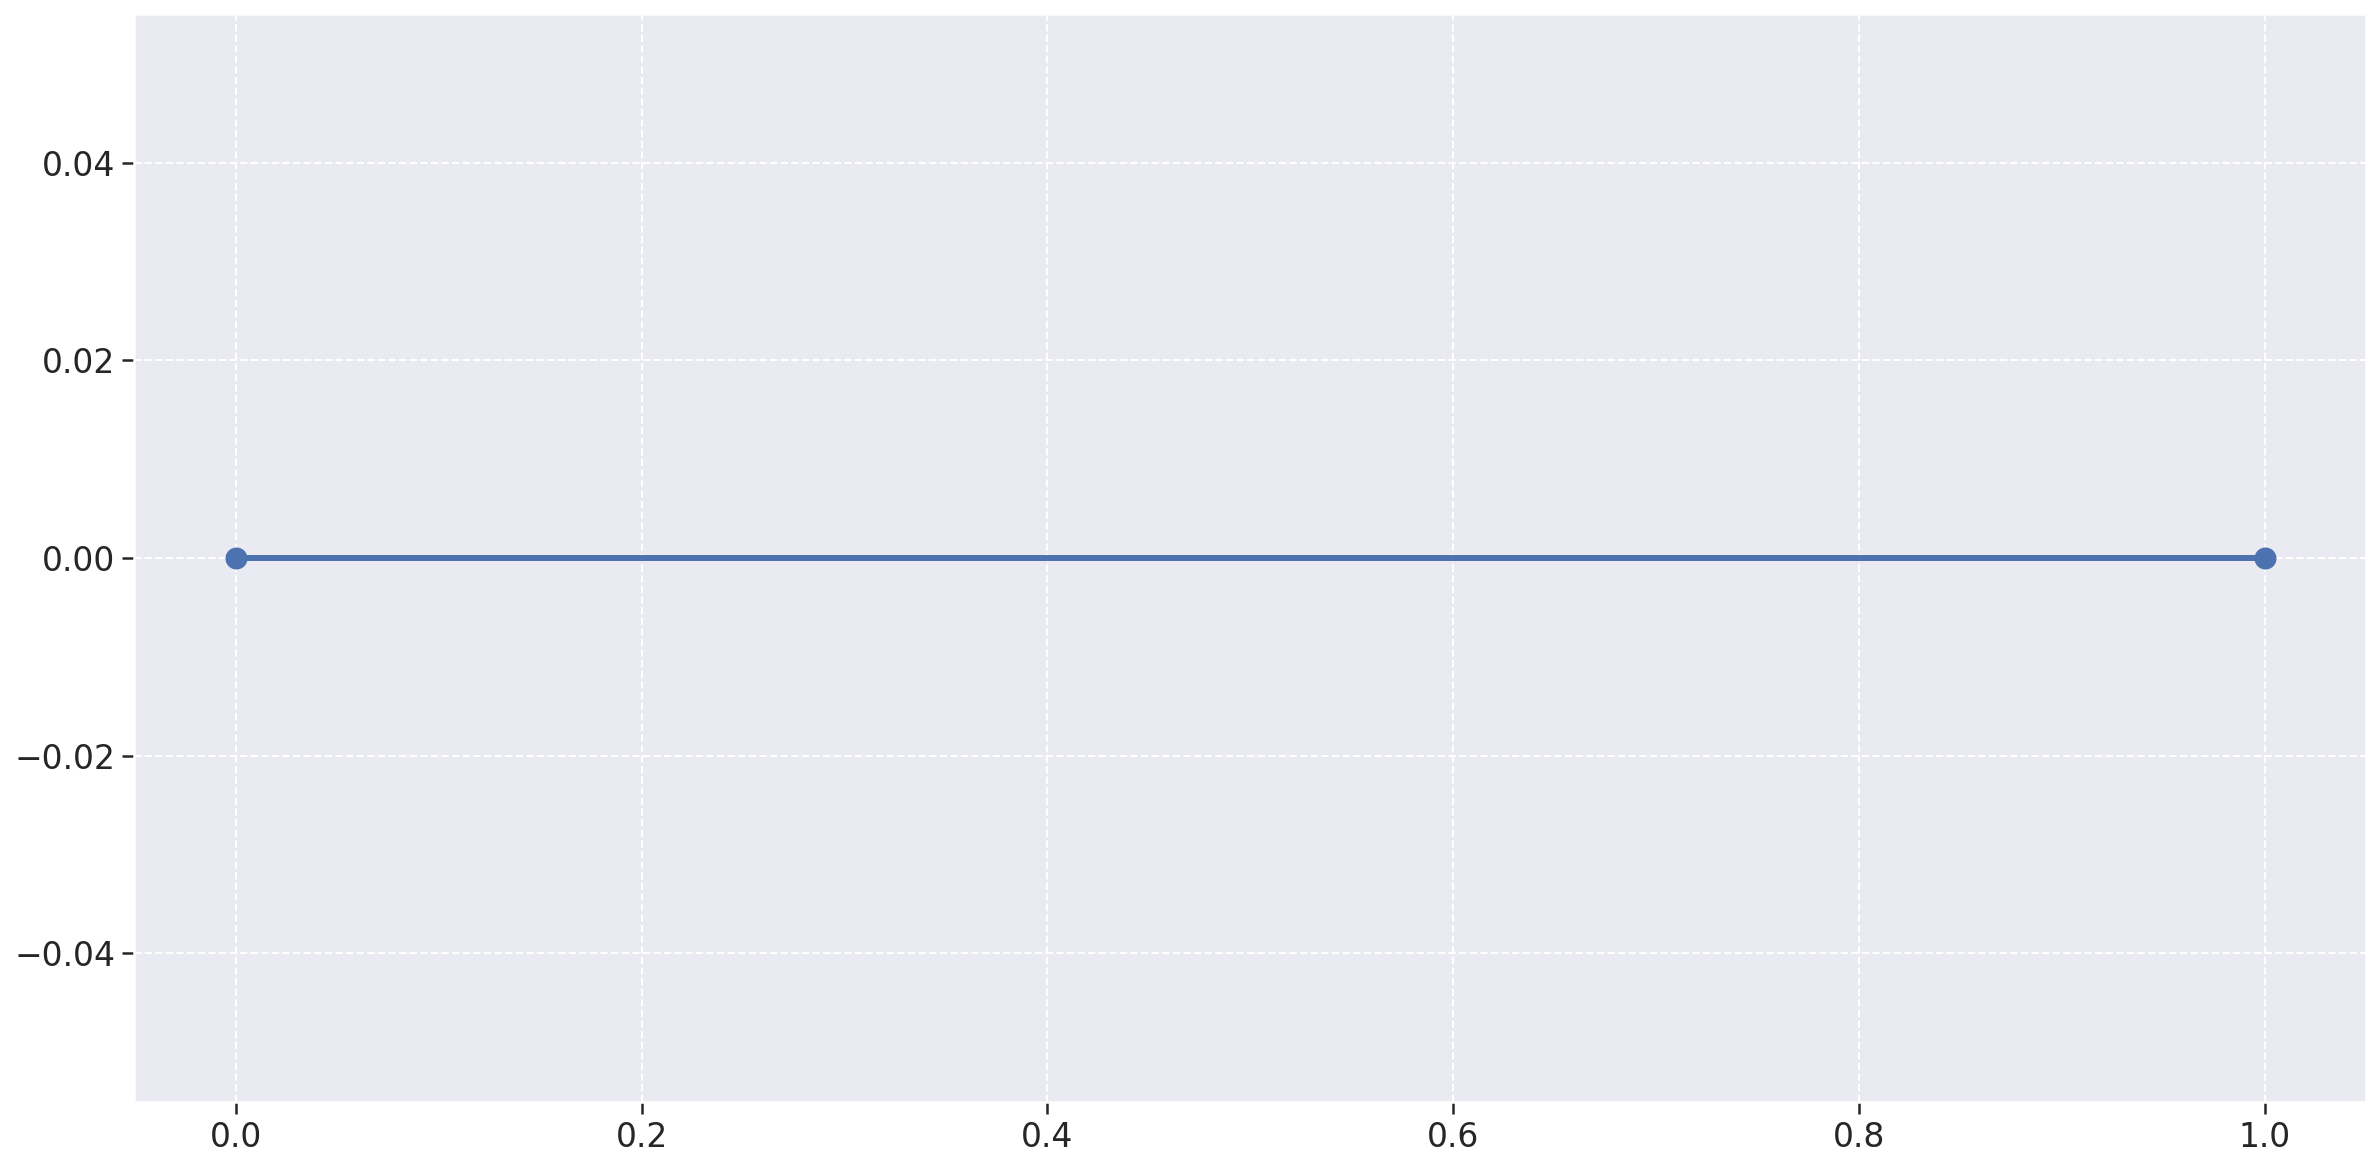

In [204]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Admin_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

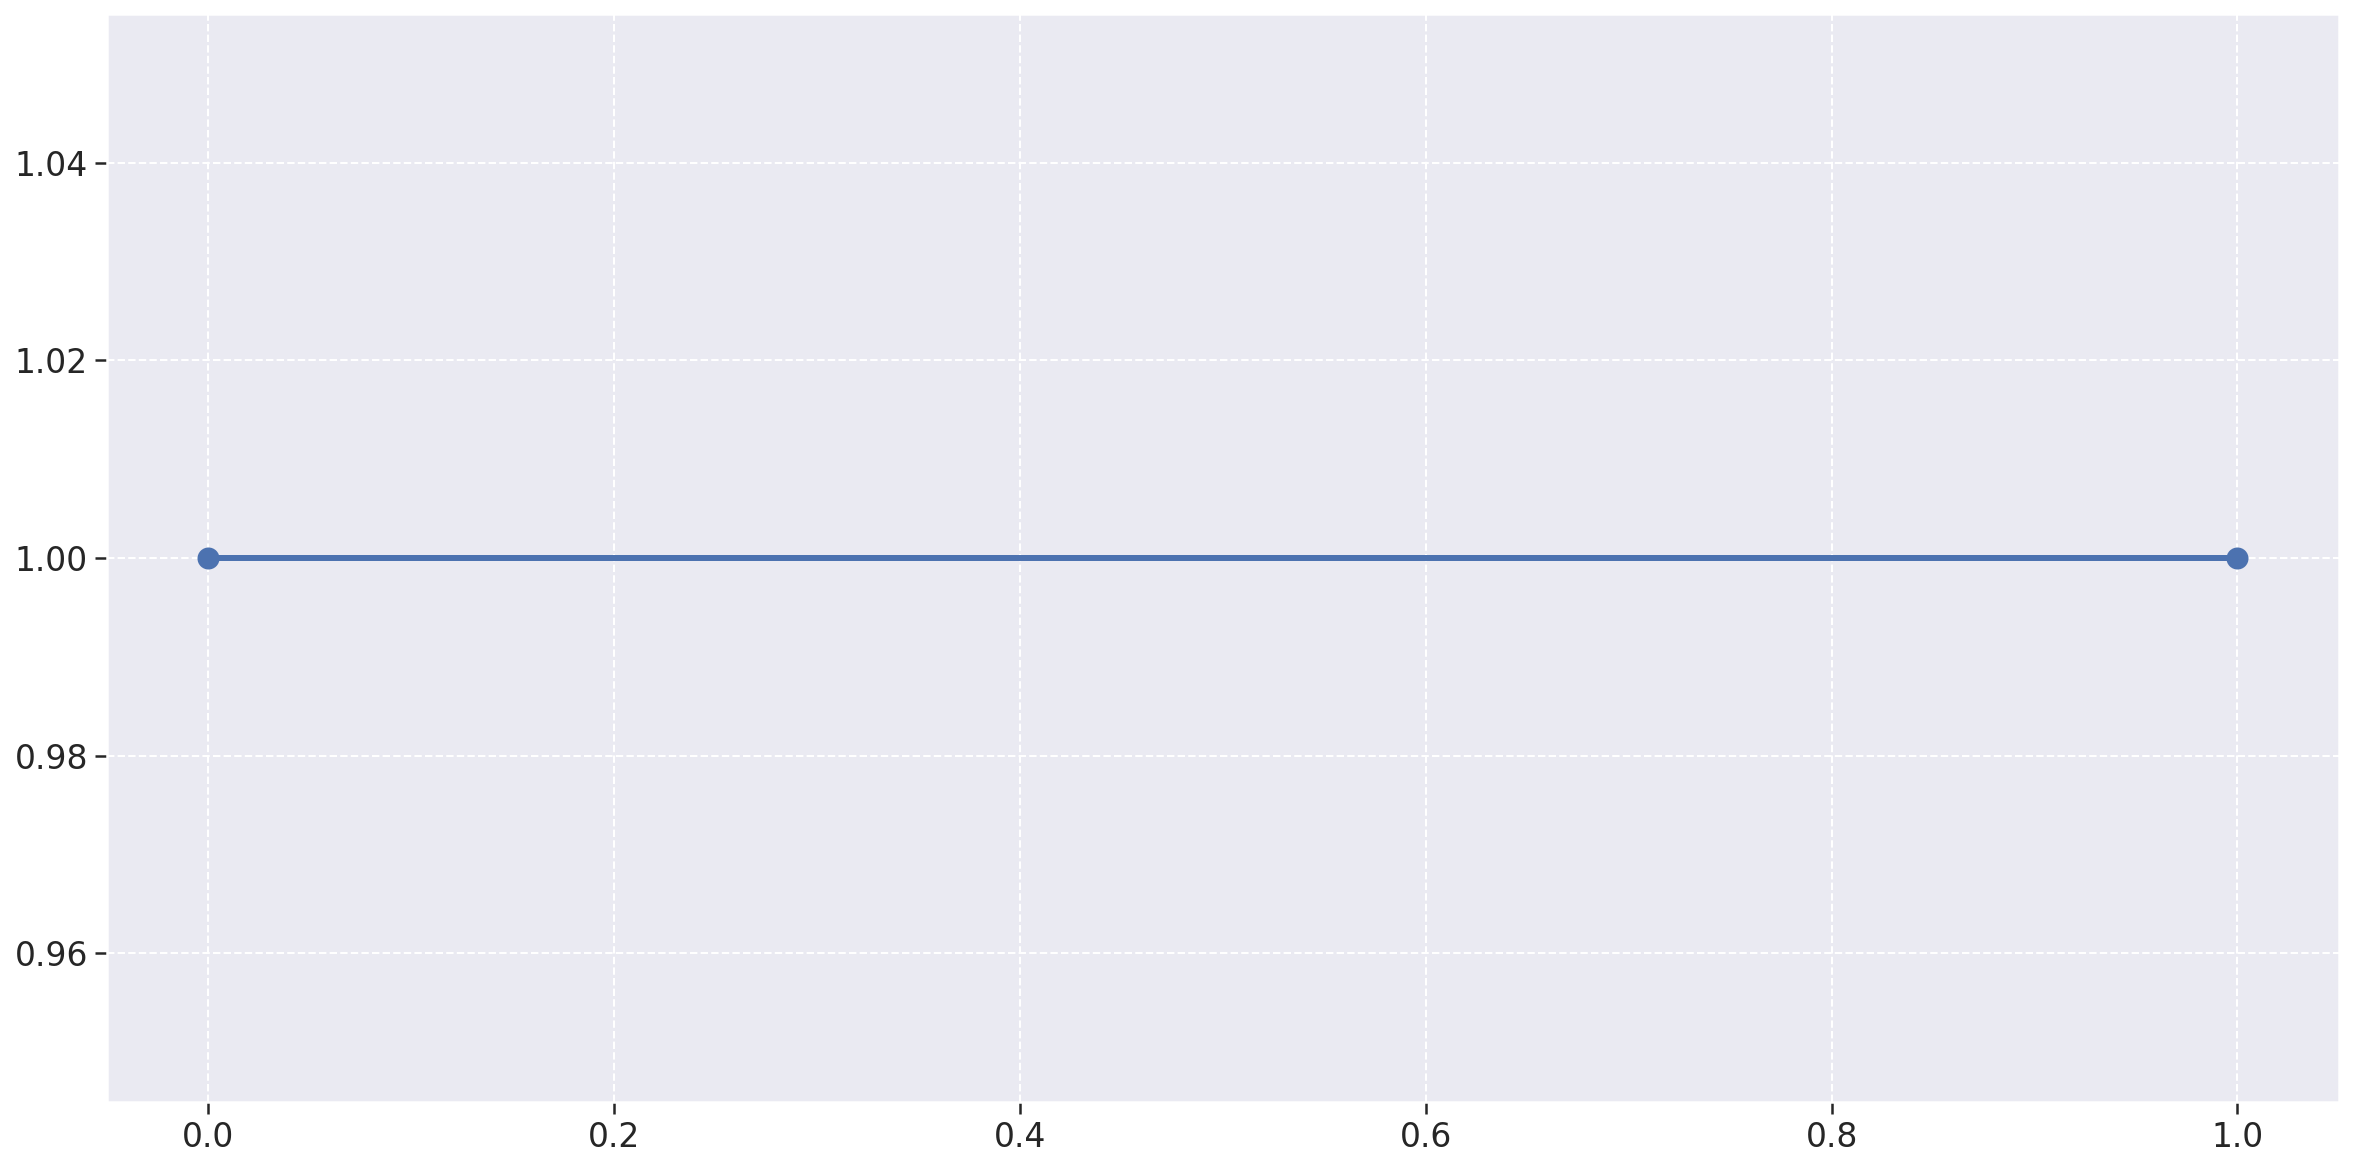

In [205]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Admin_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

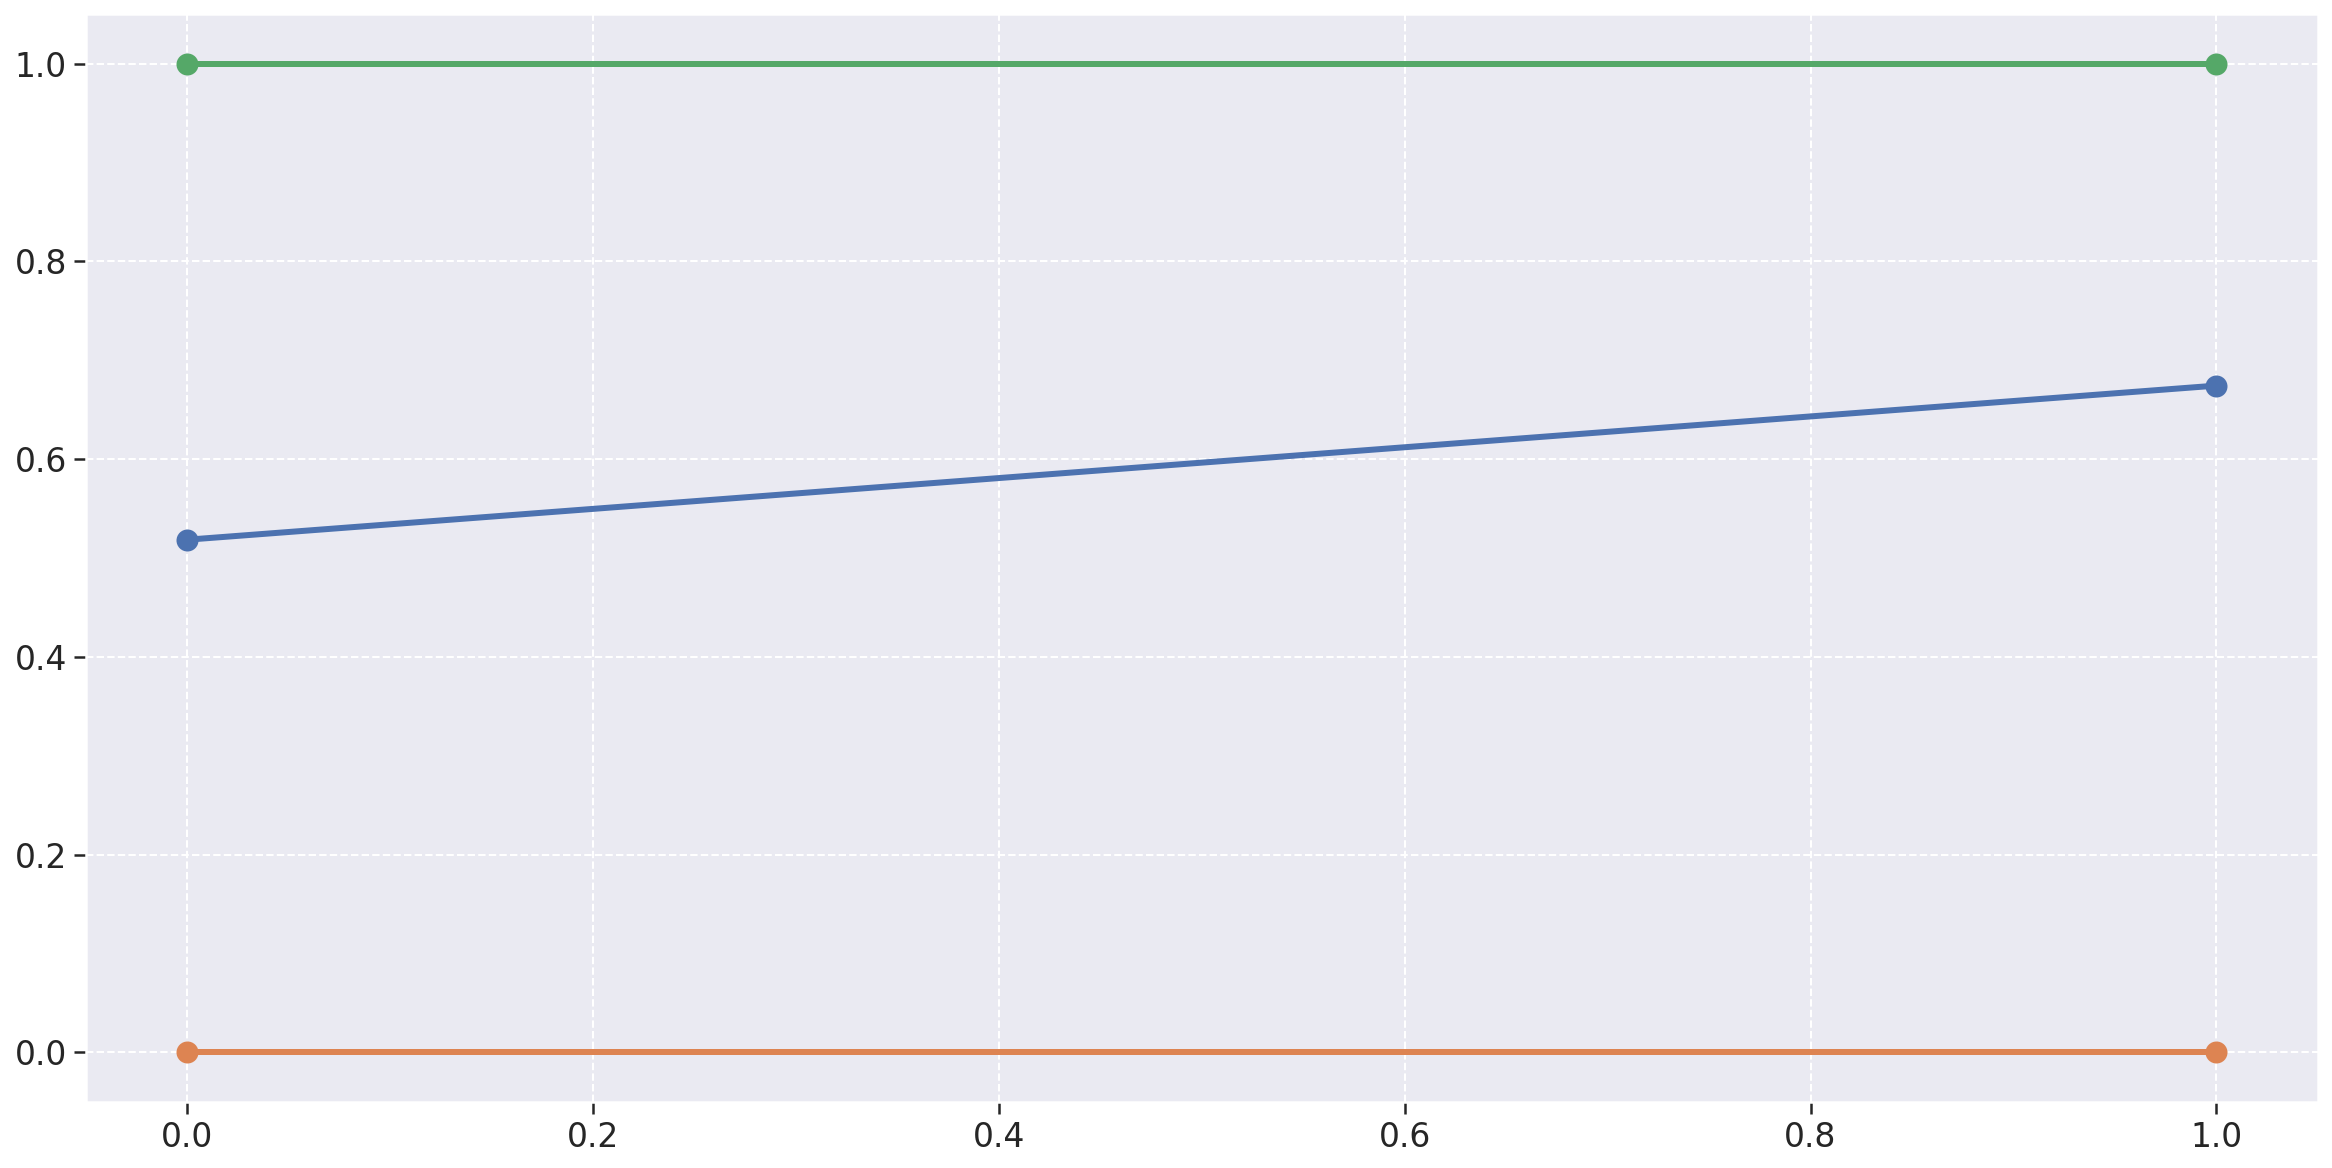

In [206]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Admin_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(Admin_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(Admin_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Mobile App

## M1

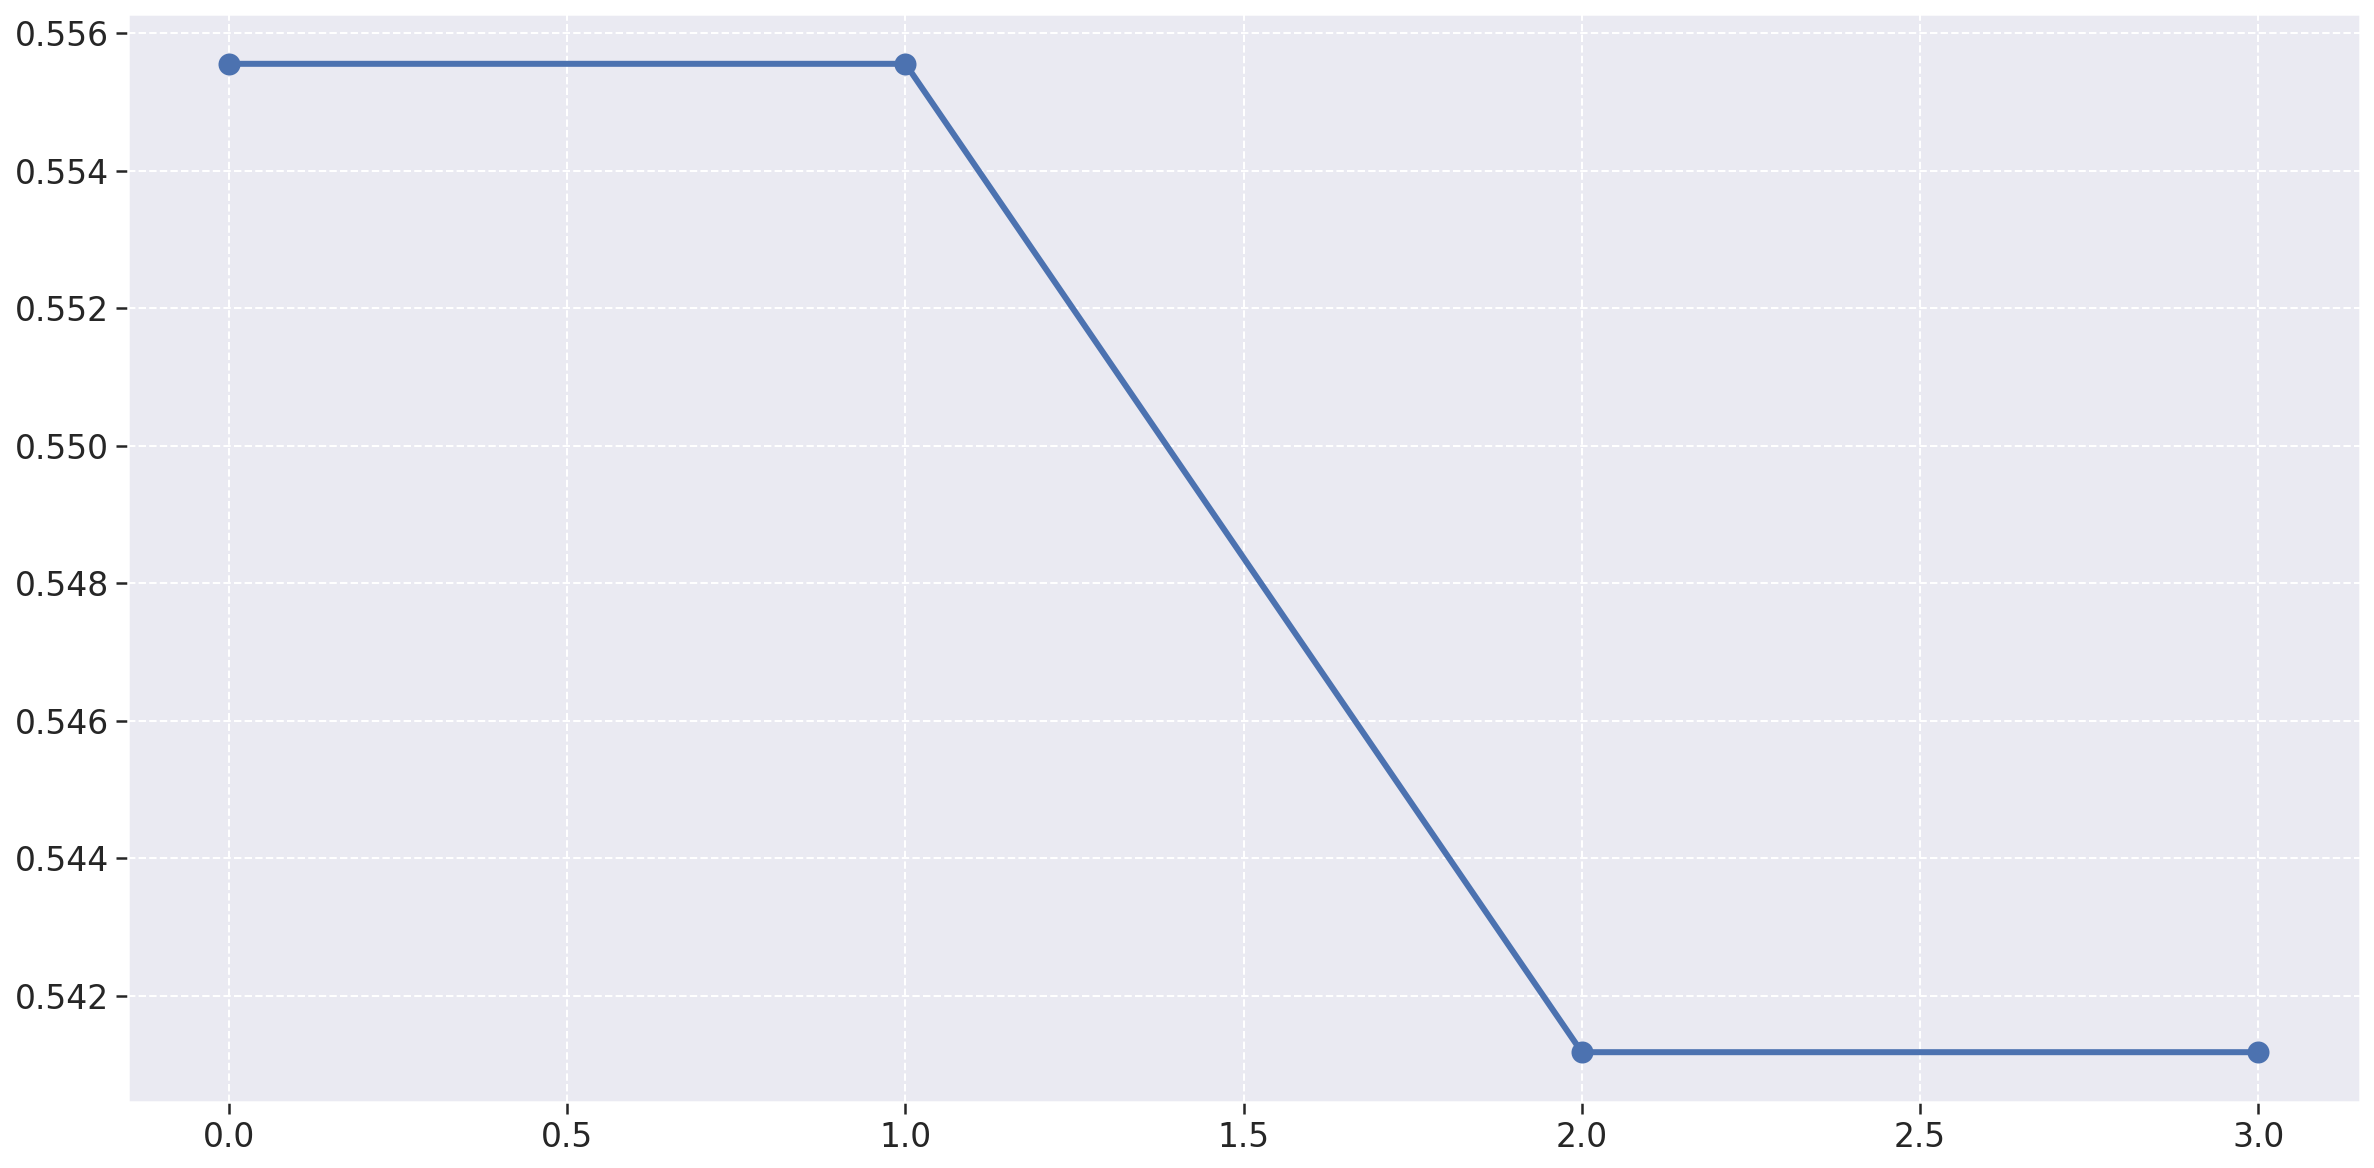

In [207]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Mobile_App_metrics['m1'], linewidth=3, marker='o', markersize=10)

## M2

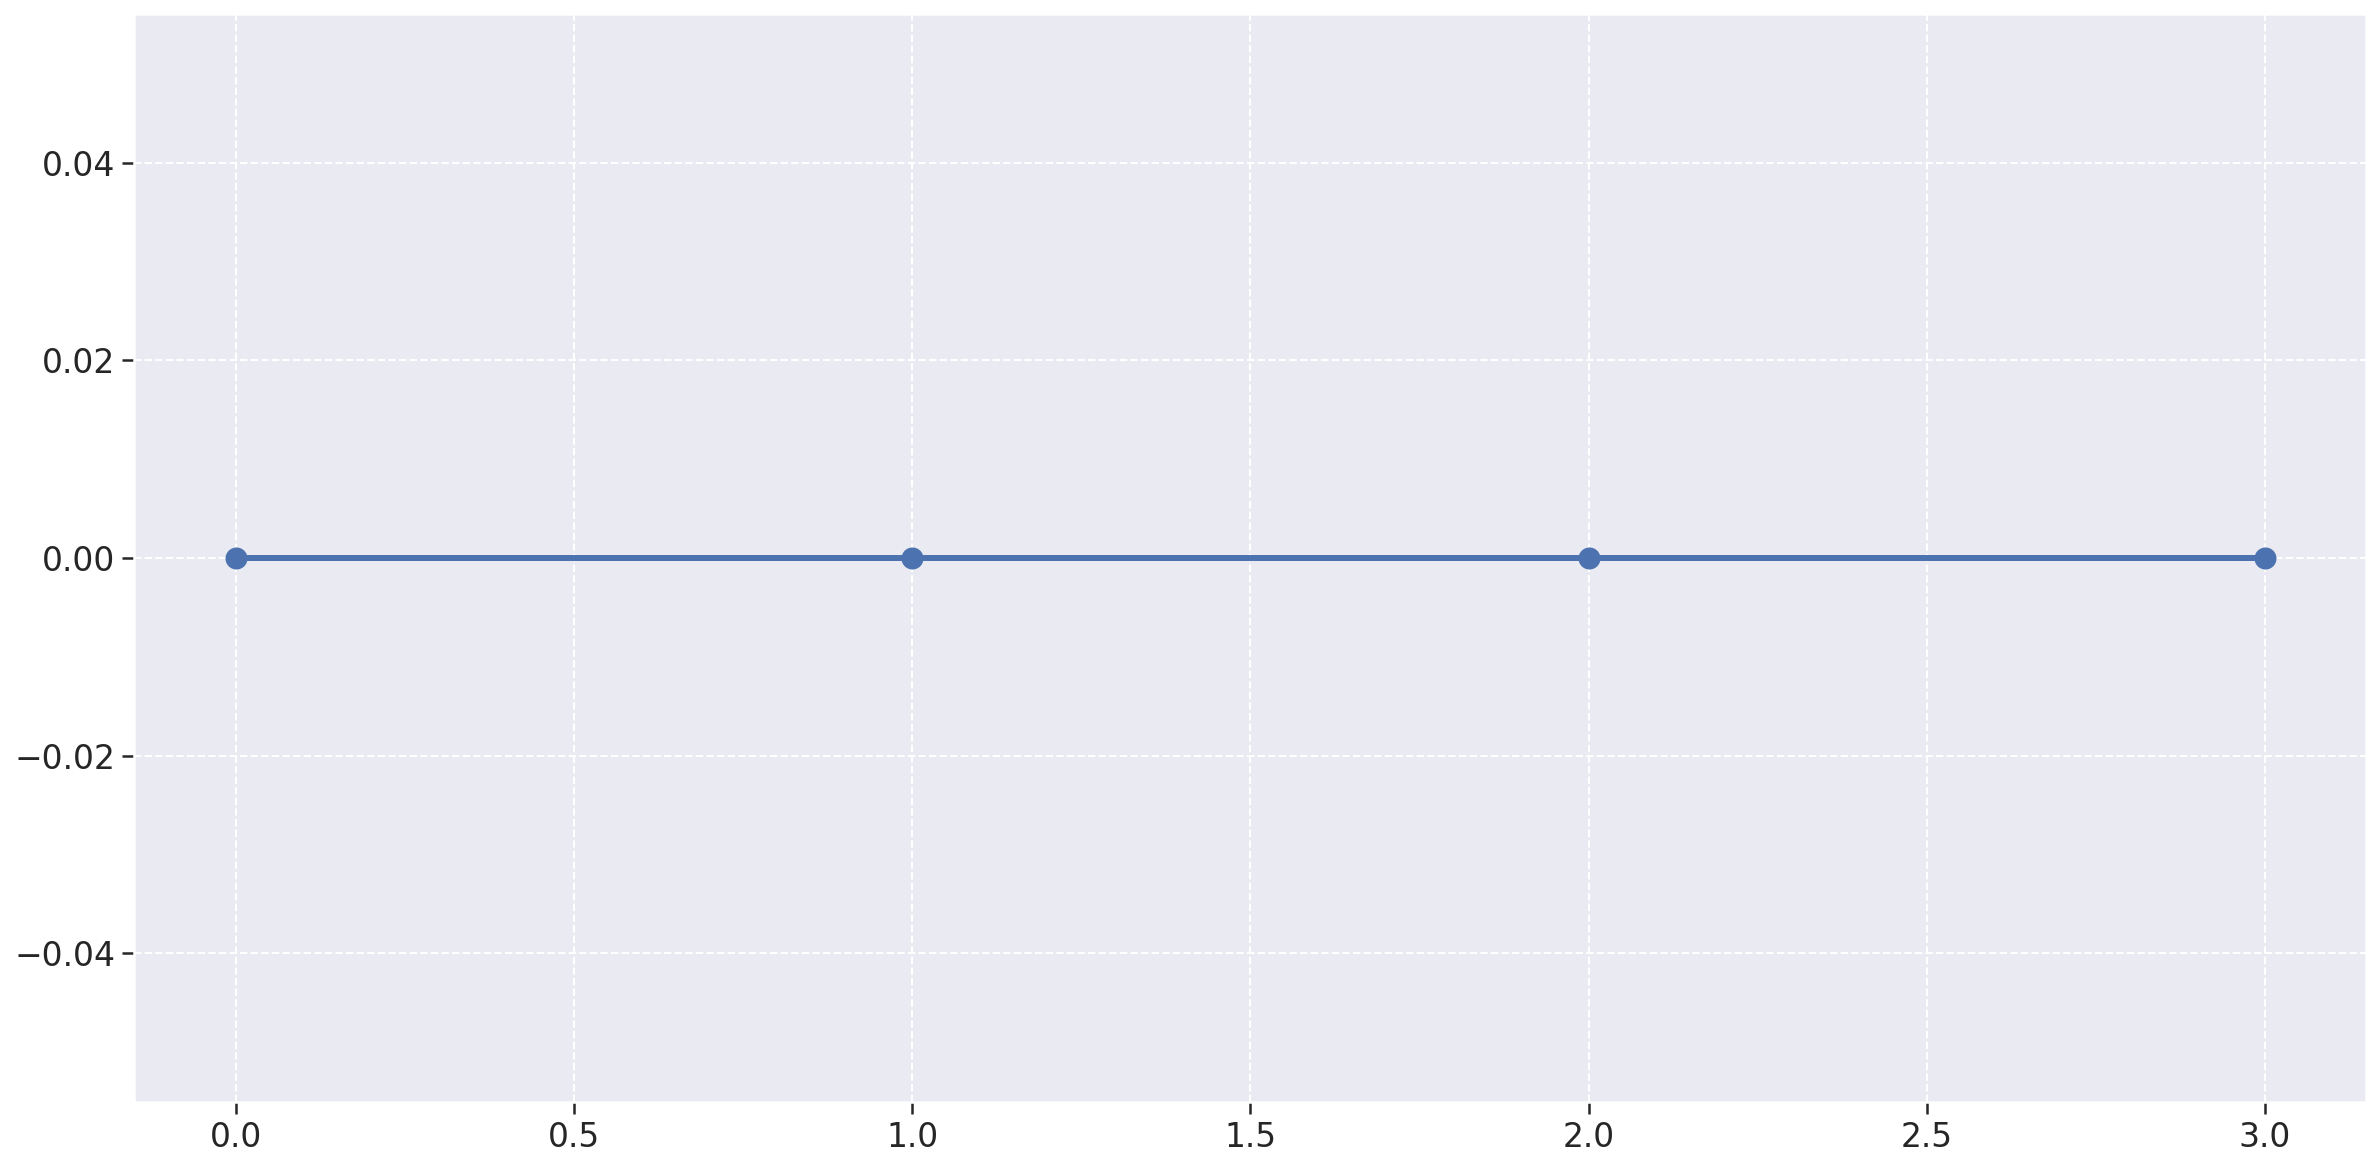

In [208]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Mobile_App_metrics['m2'], linewidth=3, marker='o', markersize=10)

## M3

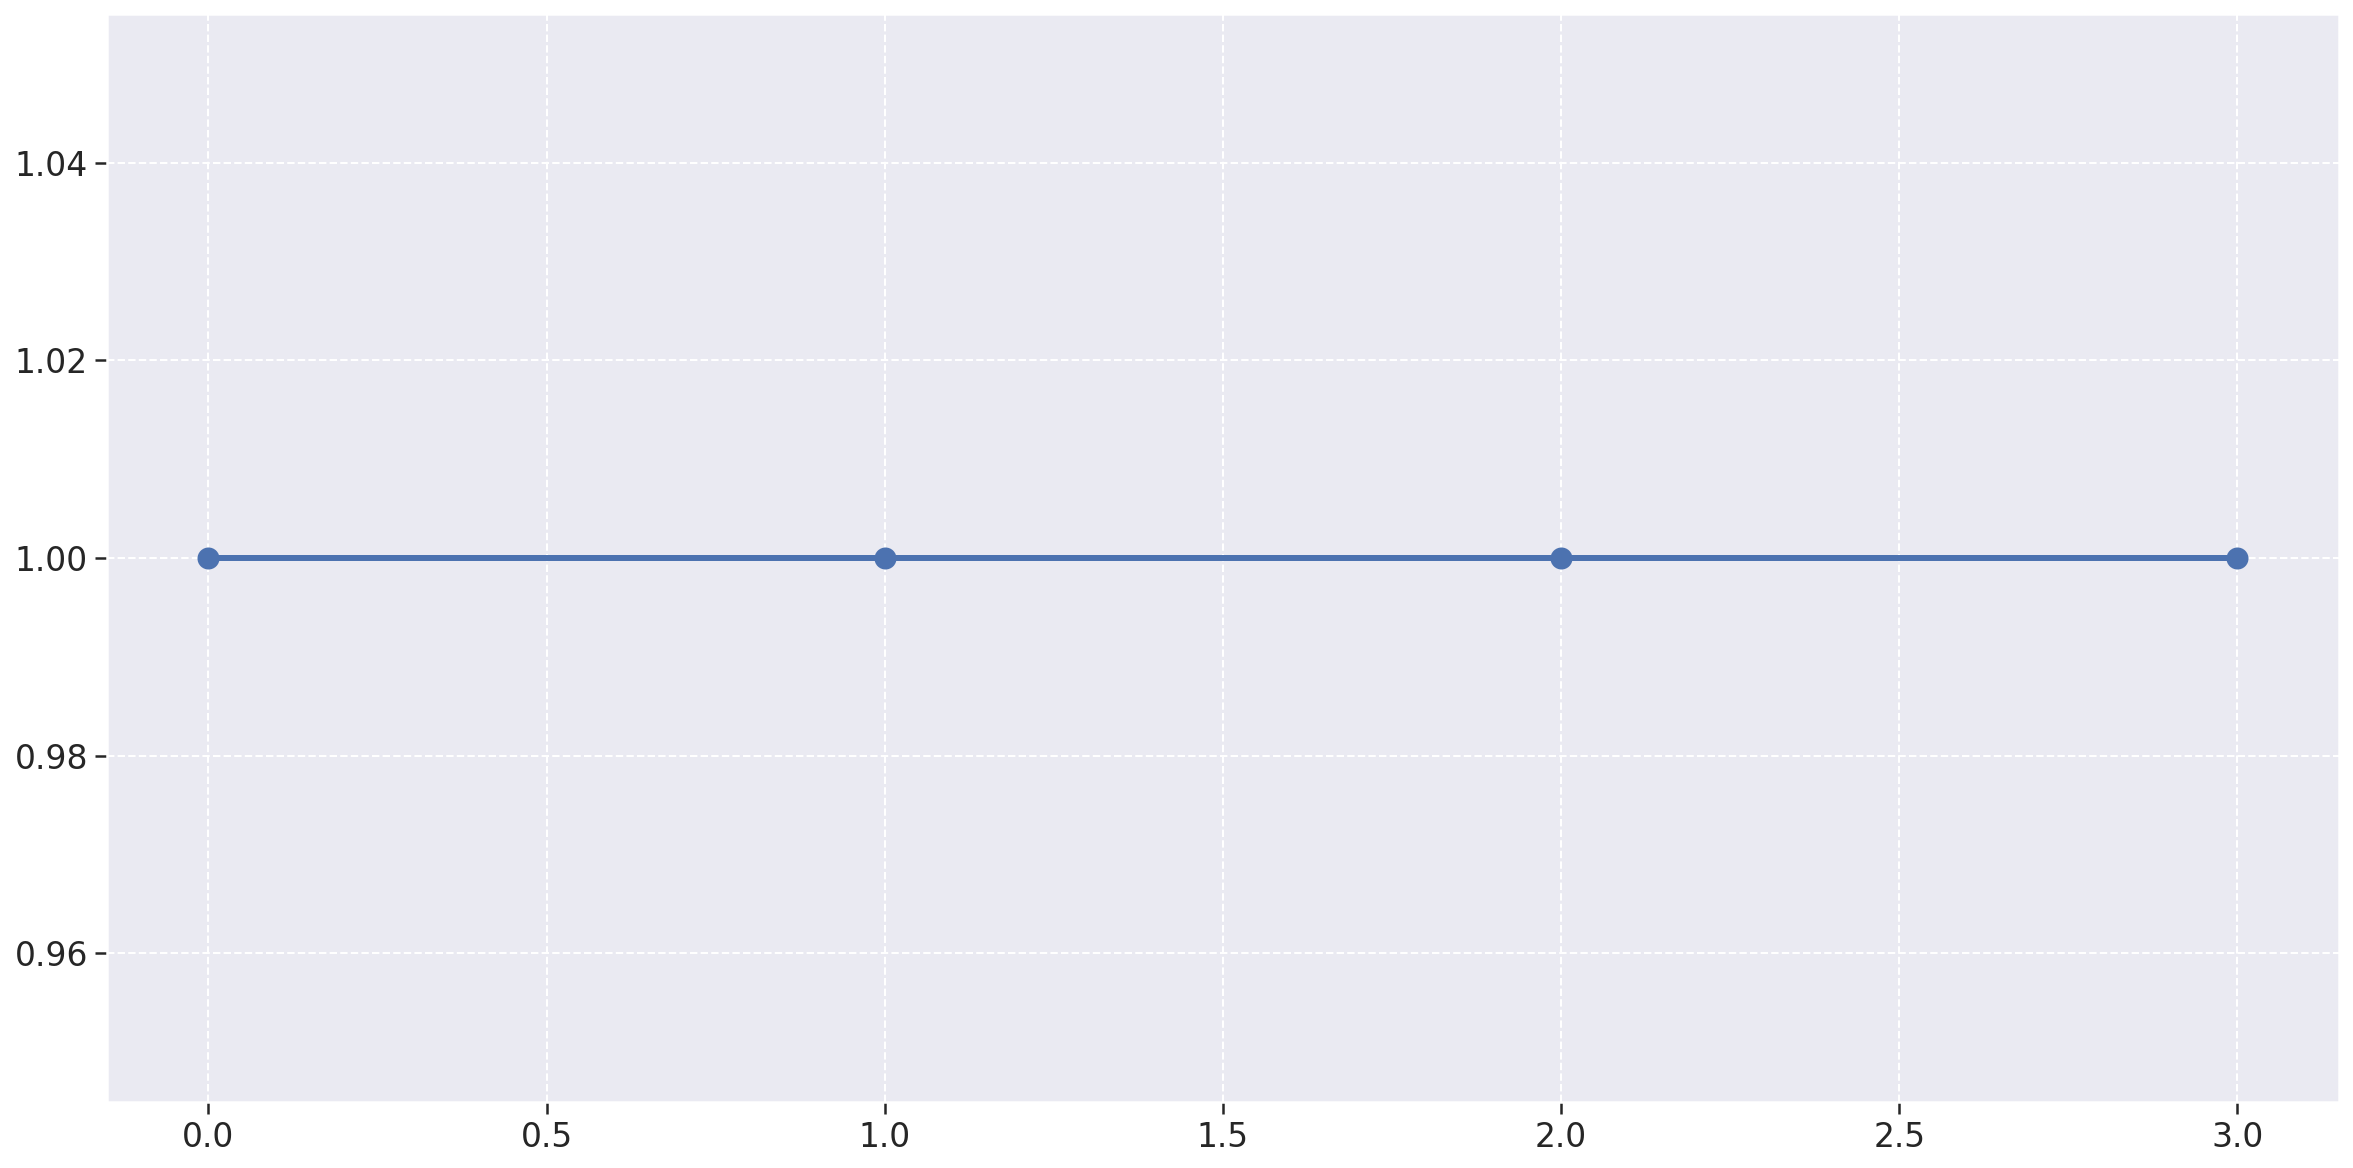

In [209]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Mobile_App_metrics['m3'], linewidth=3, marker='o', markersize=10)

## TOTAL

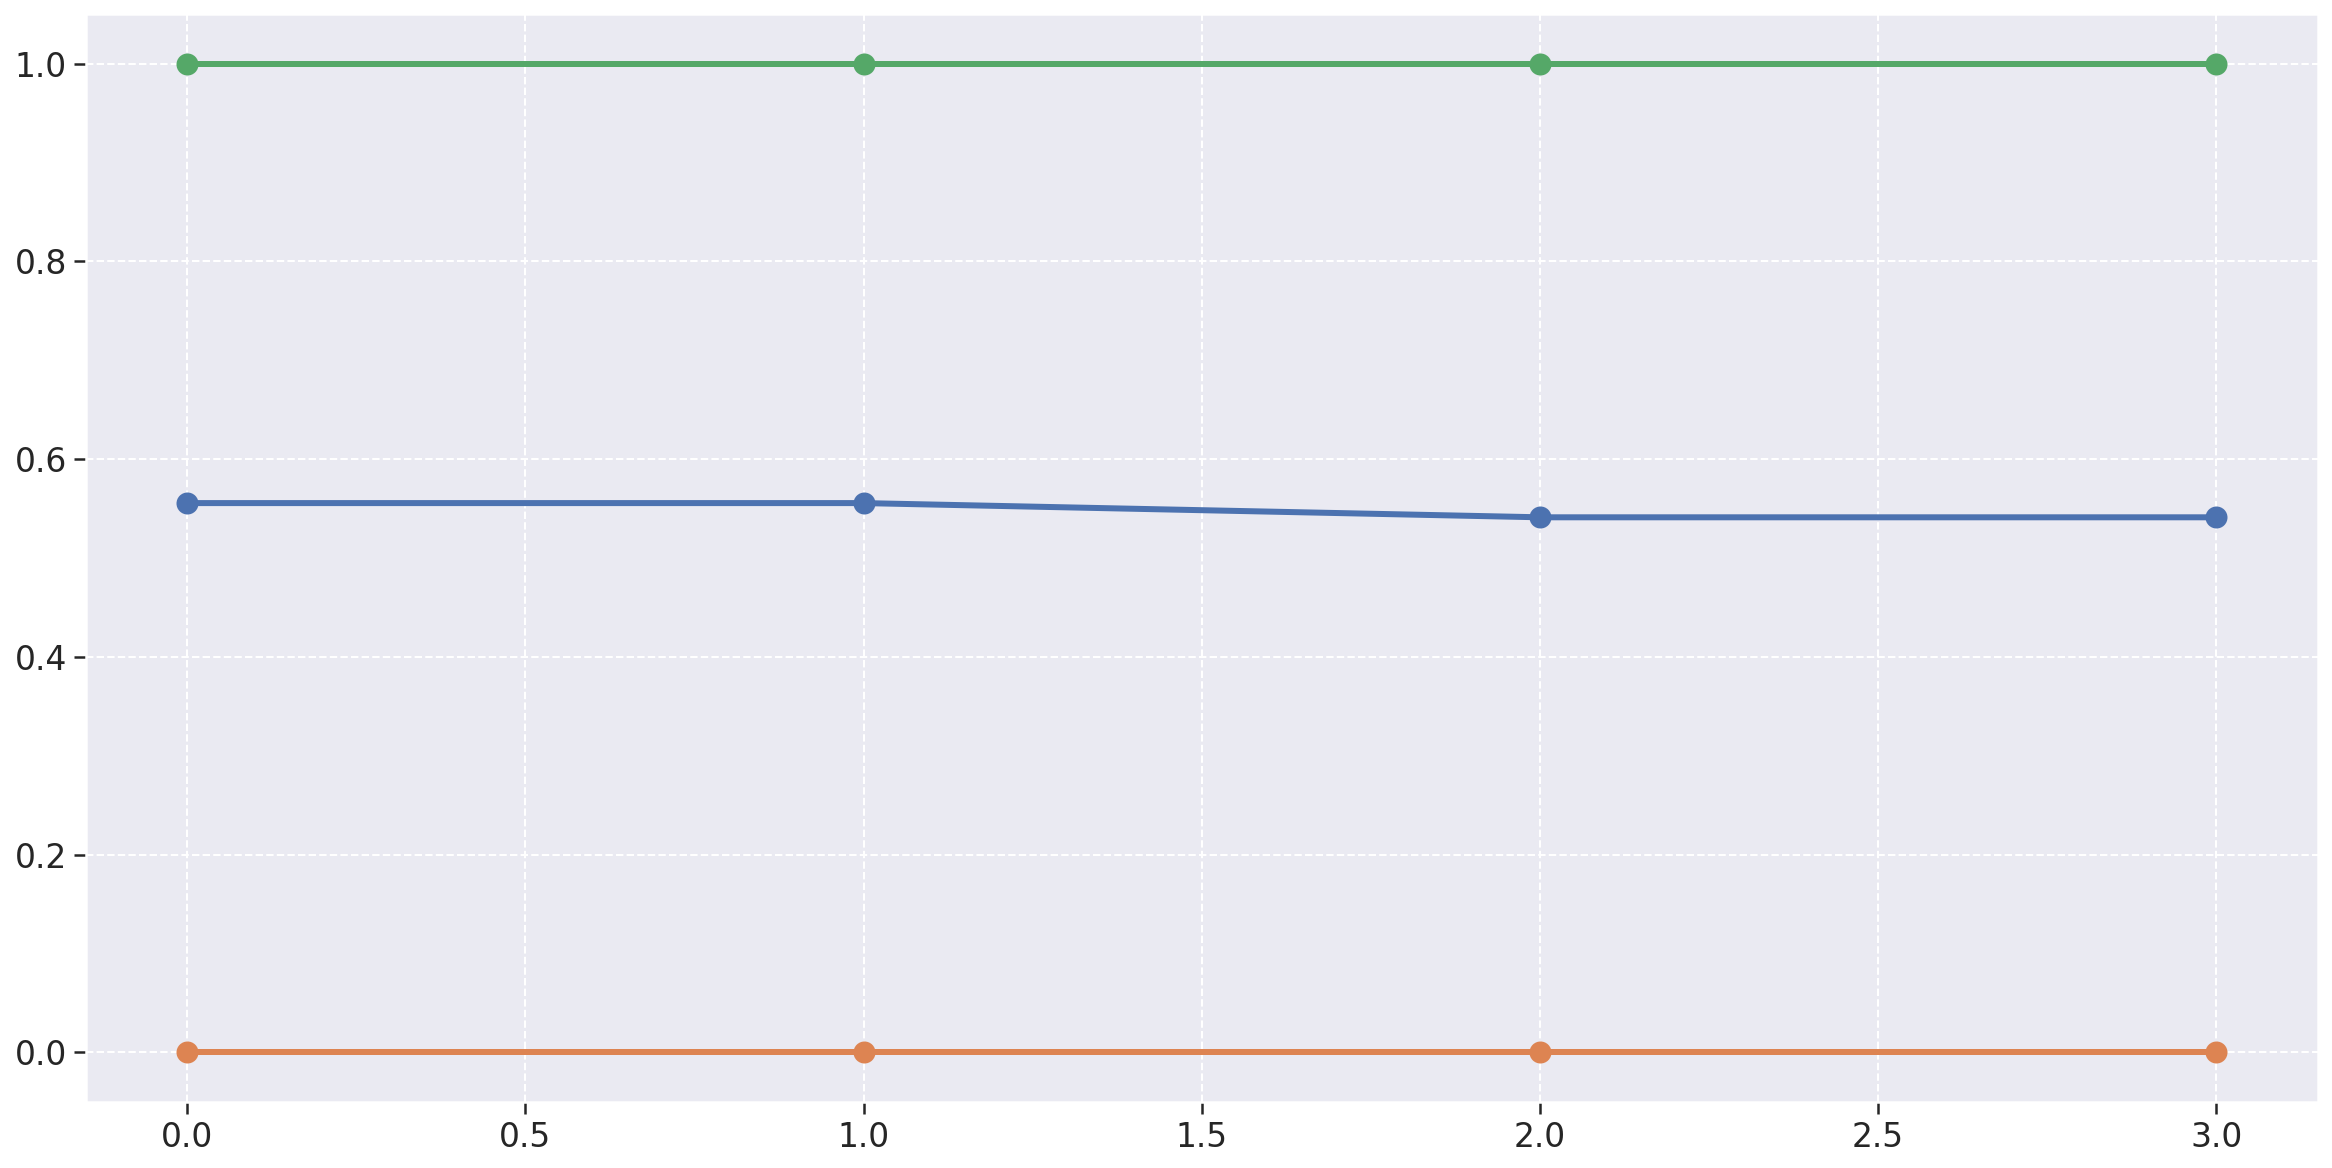

In [210]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Mobile_App_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(Mobile_App_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(Mobile_App_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Content

# M1

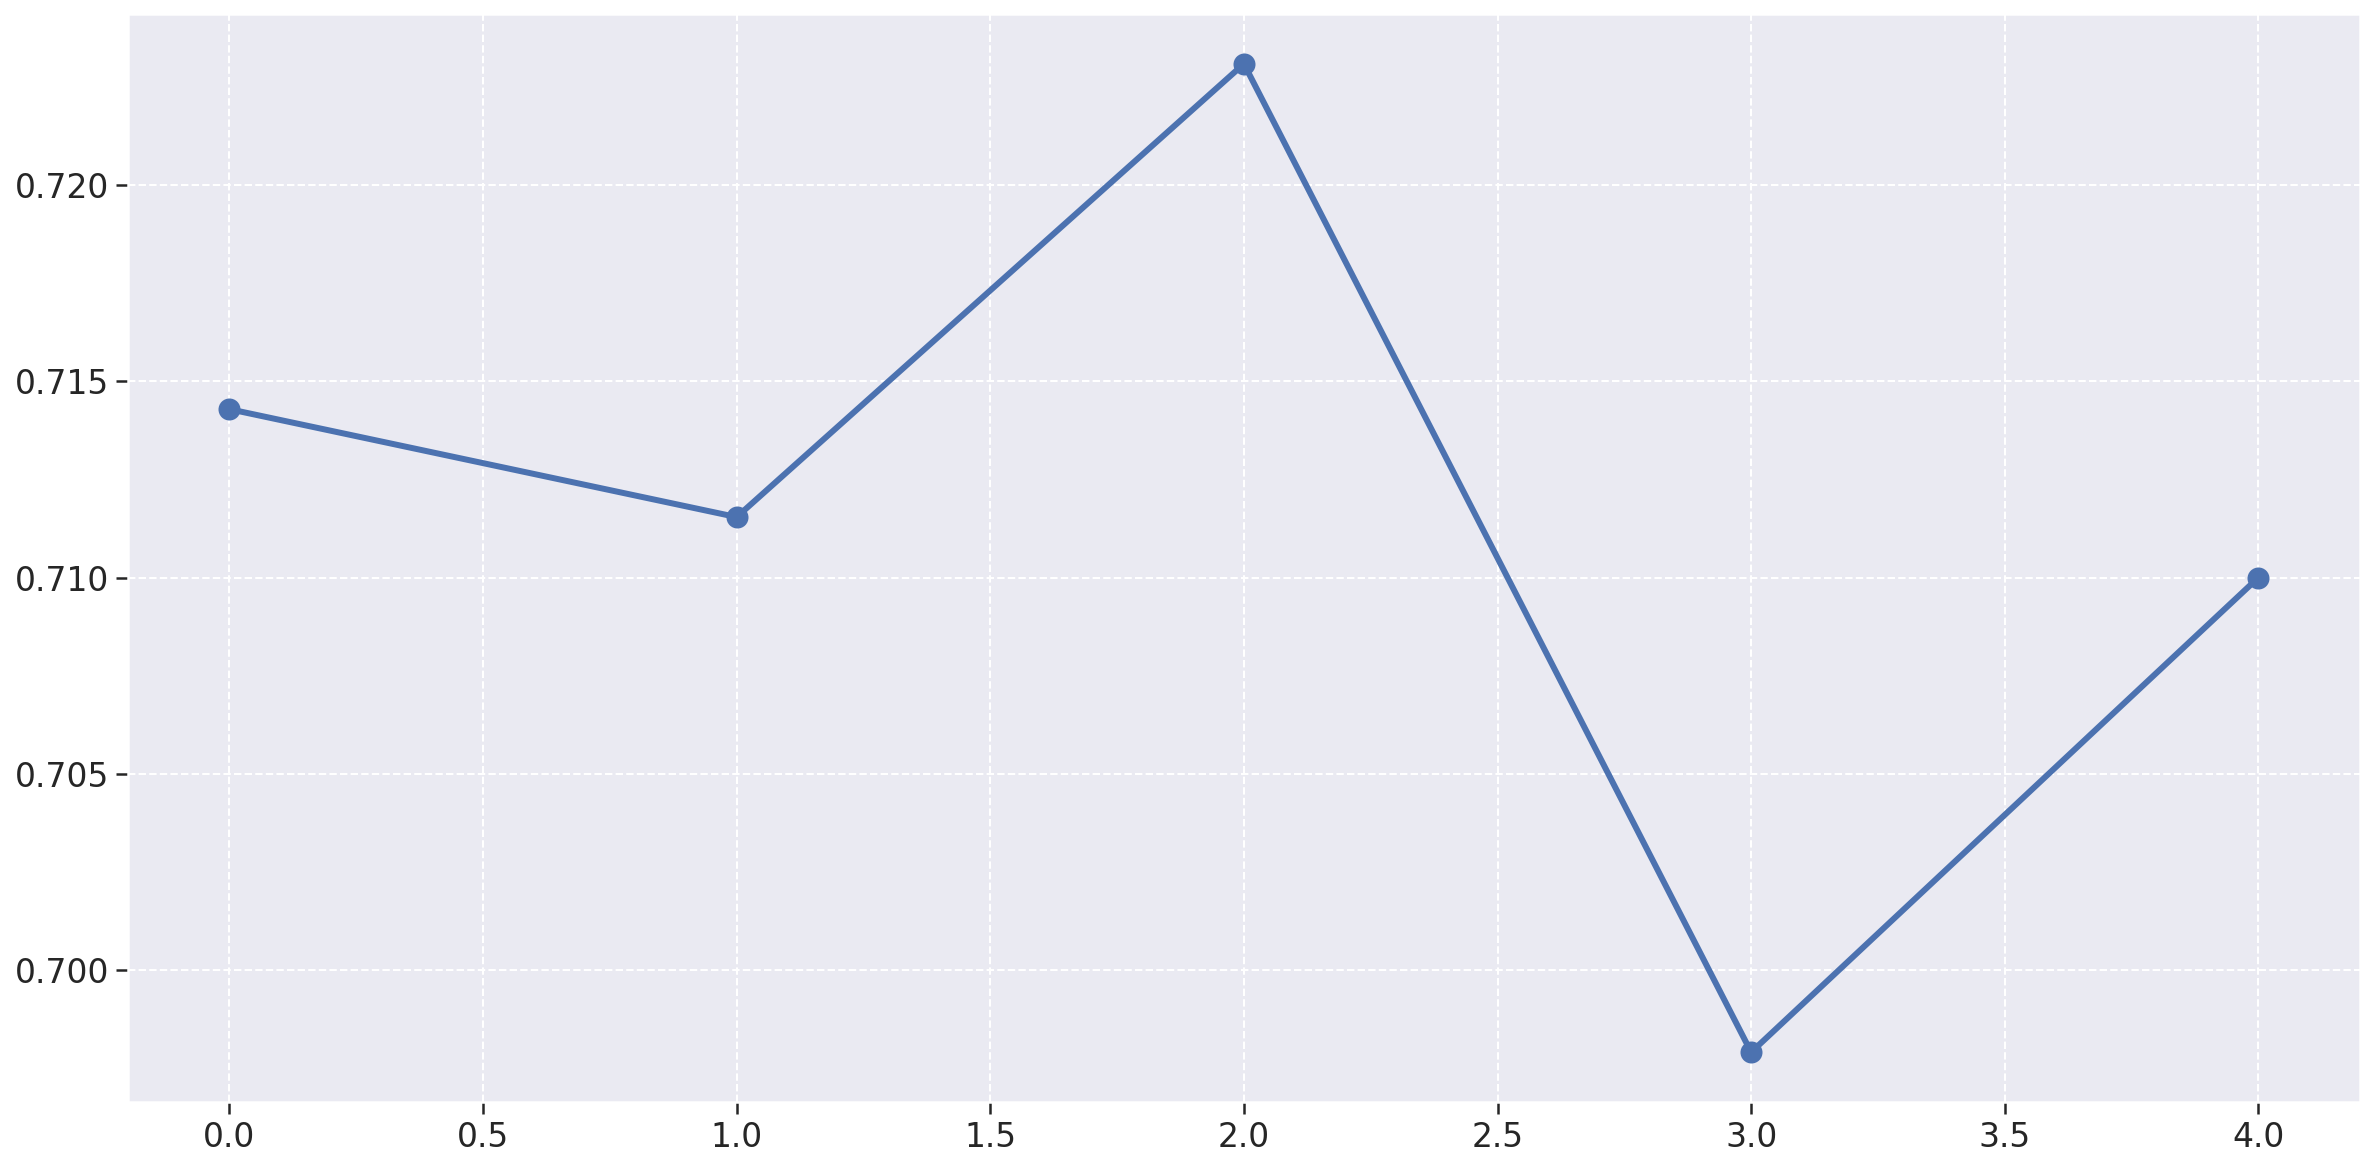

In [213]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Content_metrics['m1'], linewidth=3, marker='o', markersize=10)

# M2

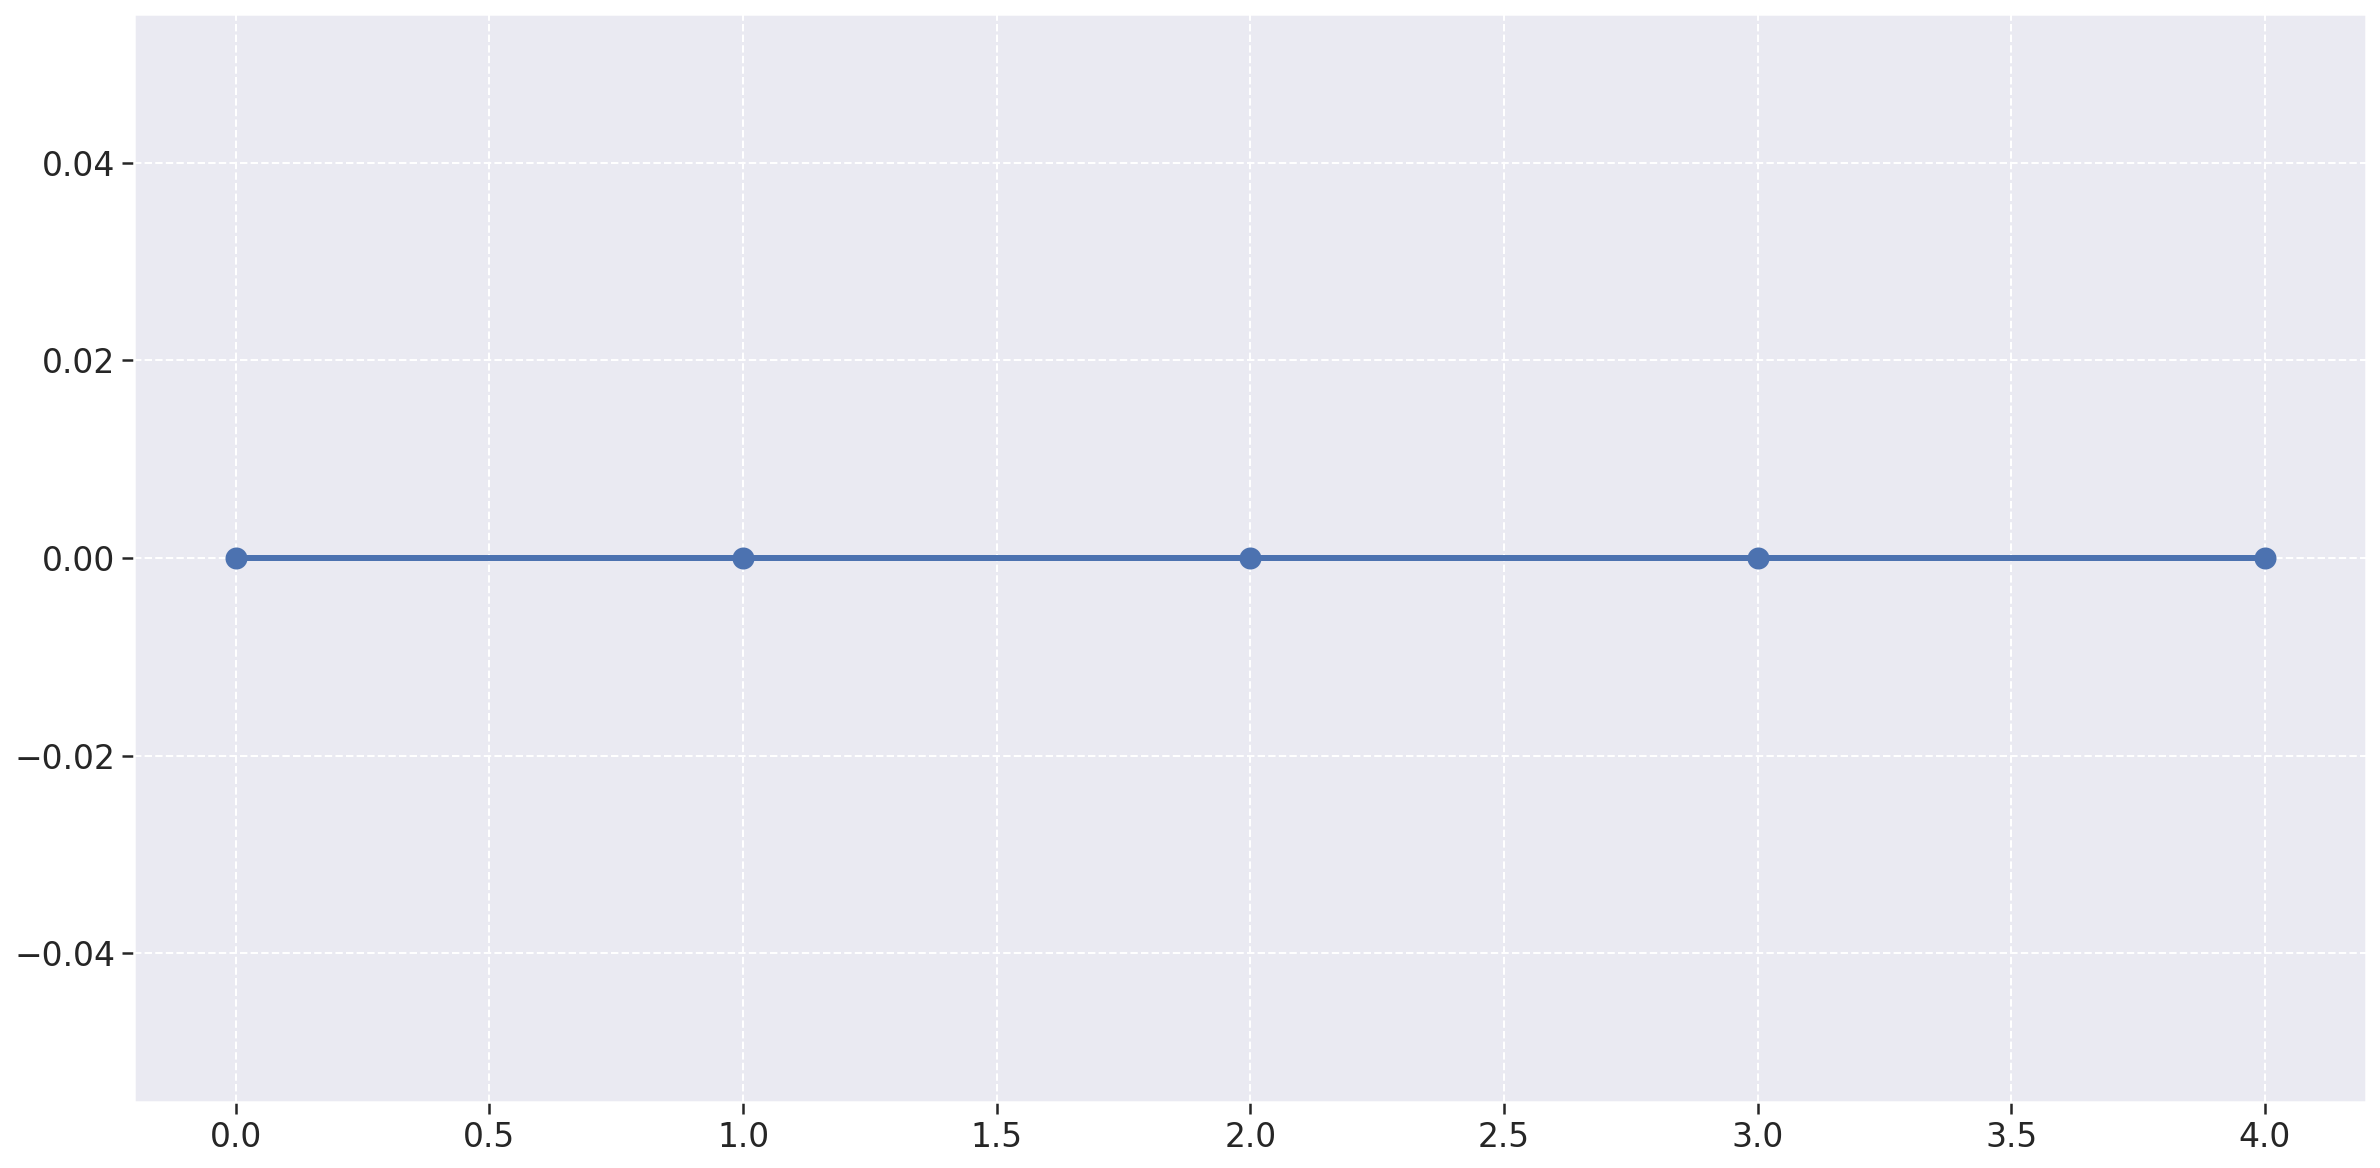

In [214]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Content_metrics['m2'], linewidth=3, marker='o', markersize=10)

# M3

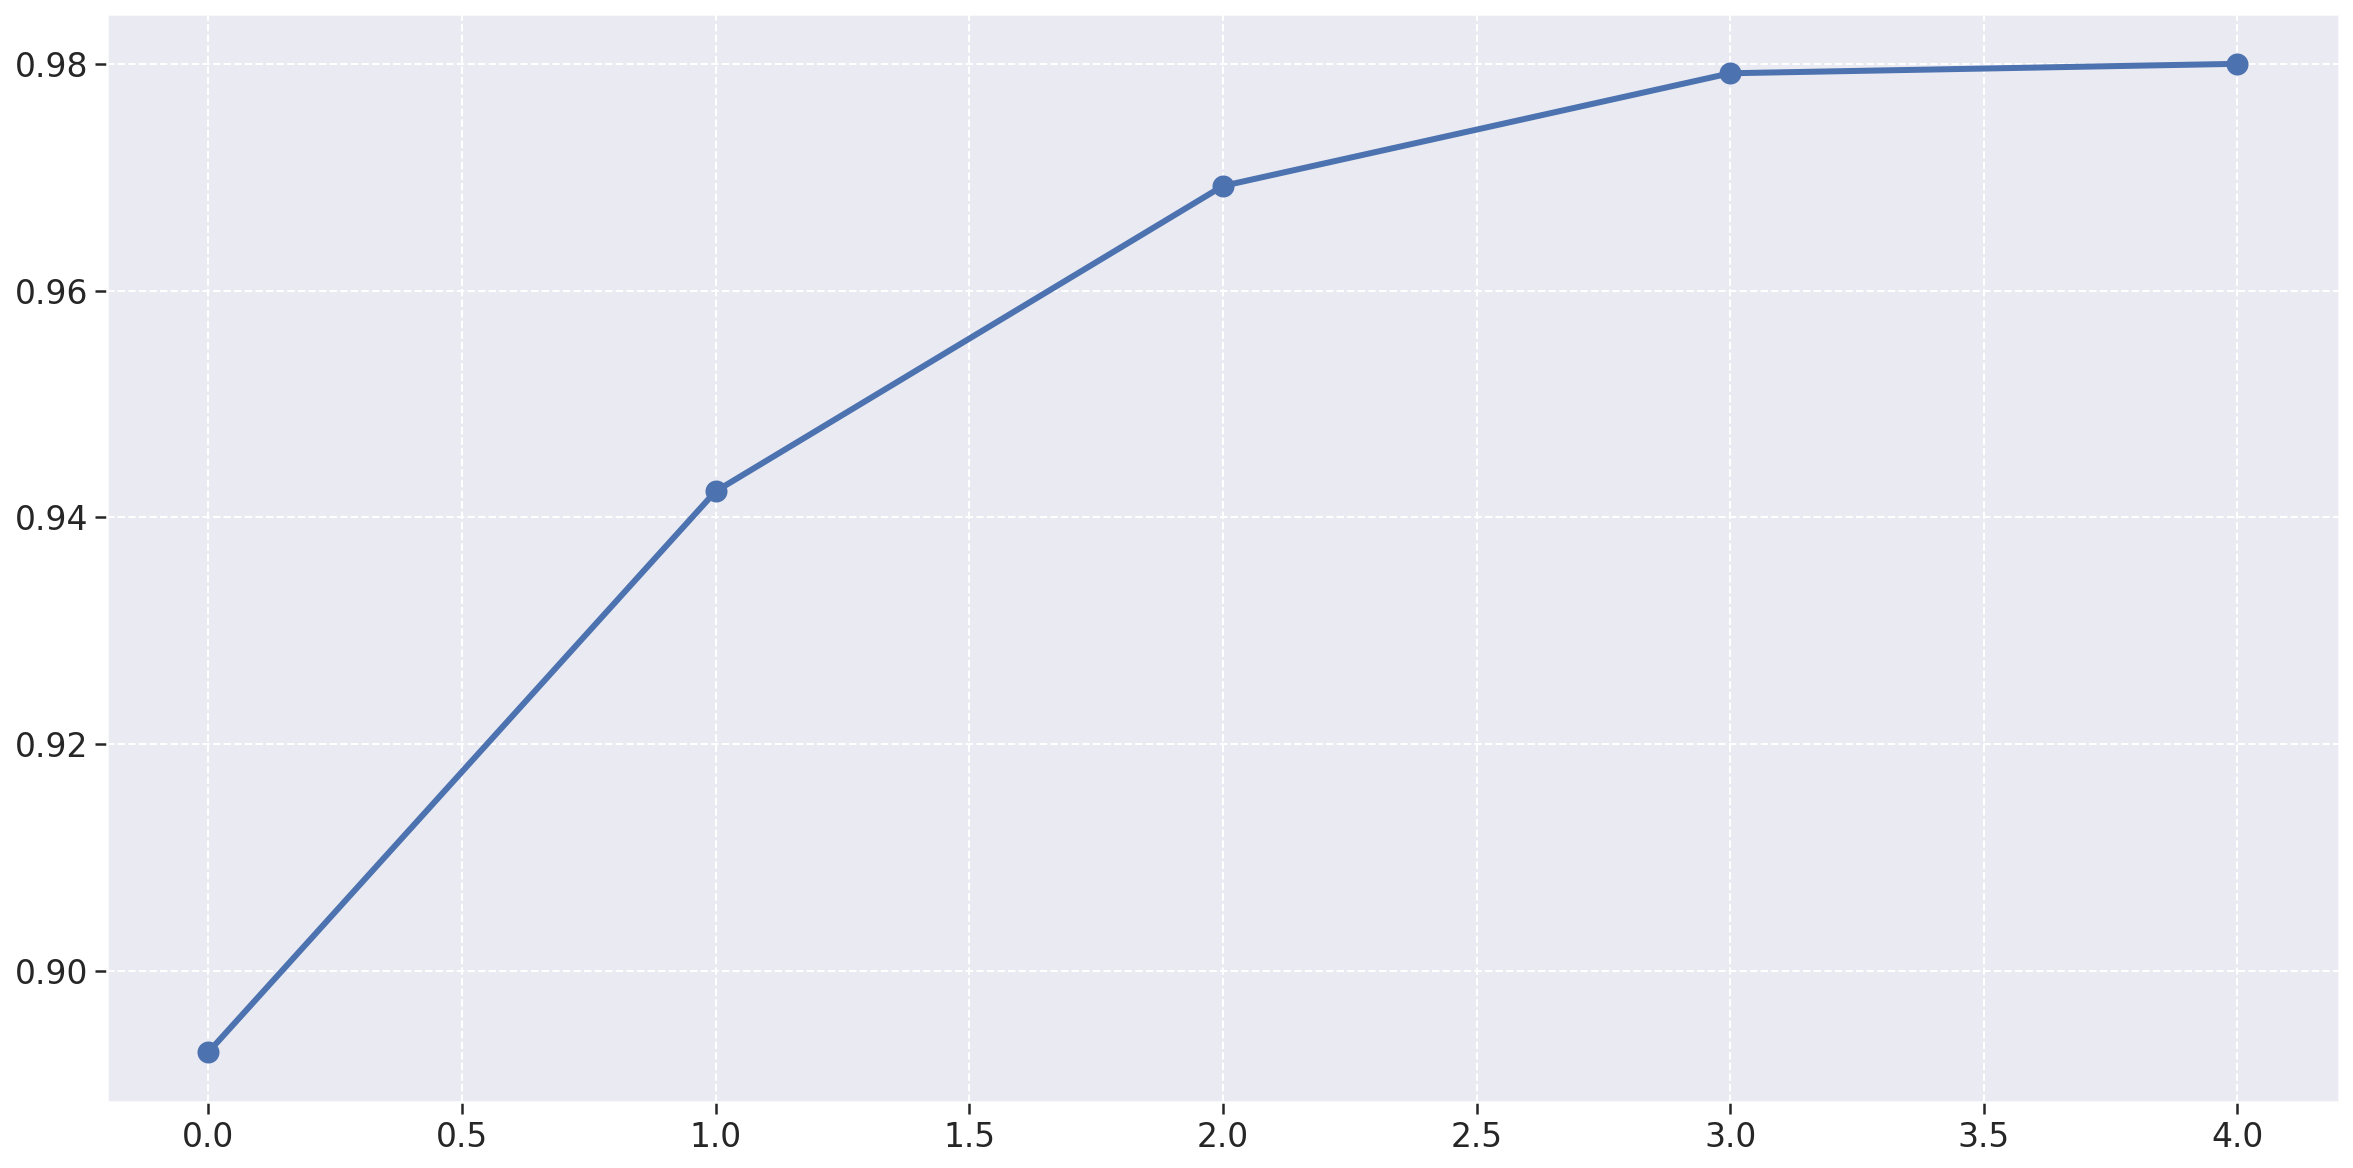

In [216]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Content_metrics['m3'], linewidth=3, marker='o', markersize=10)

# Total

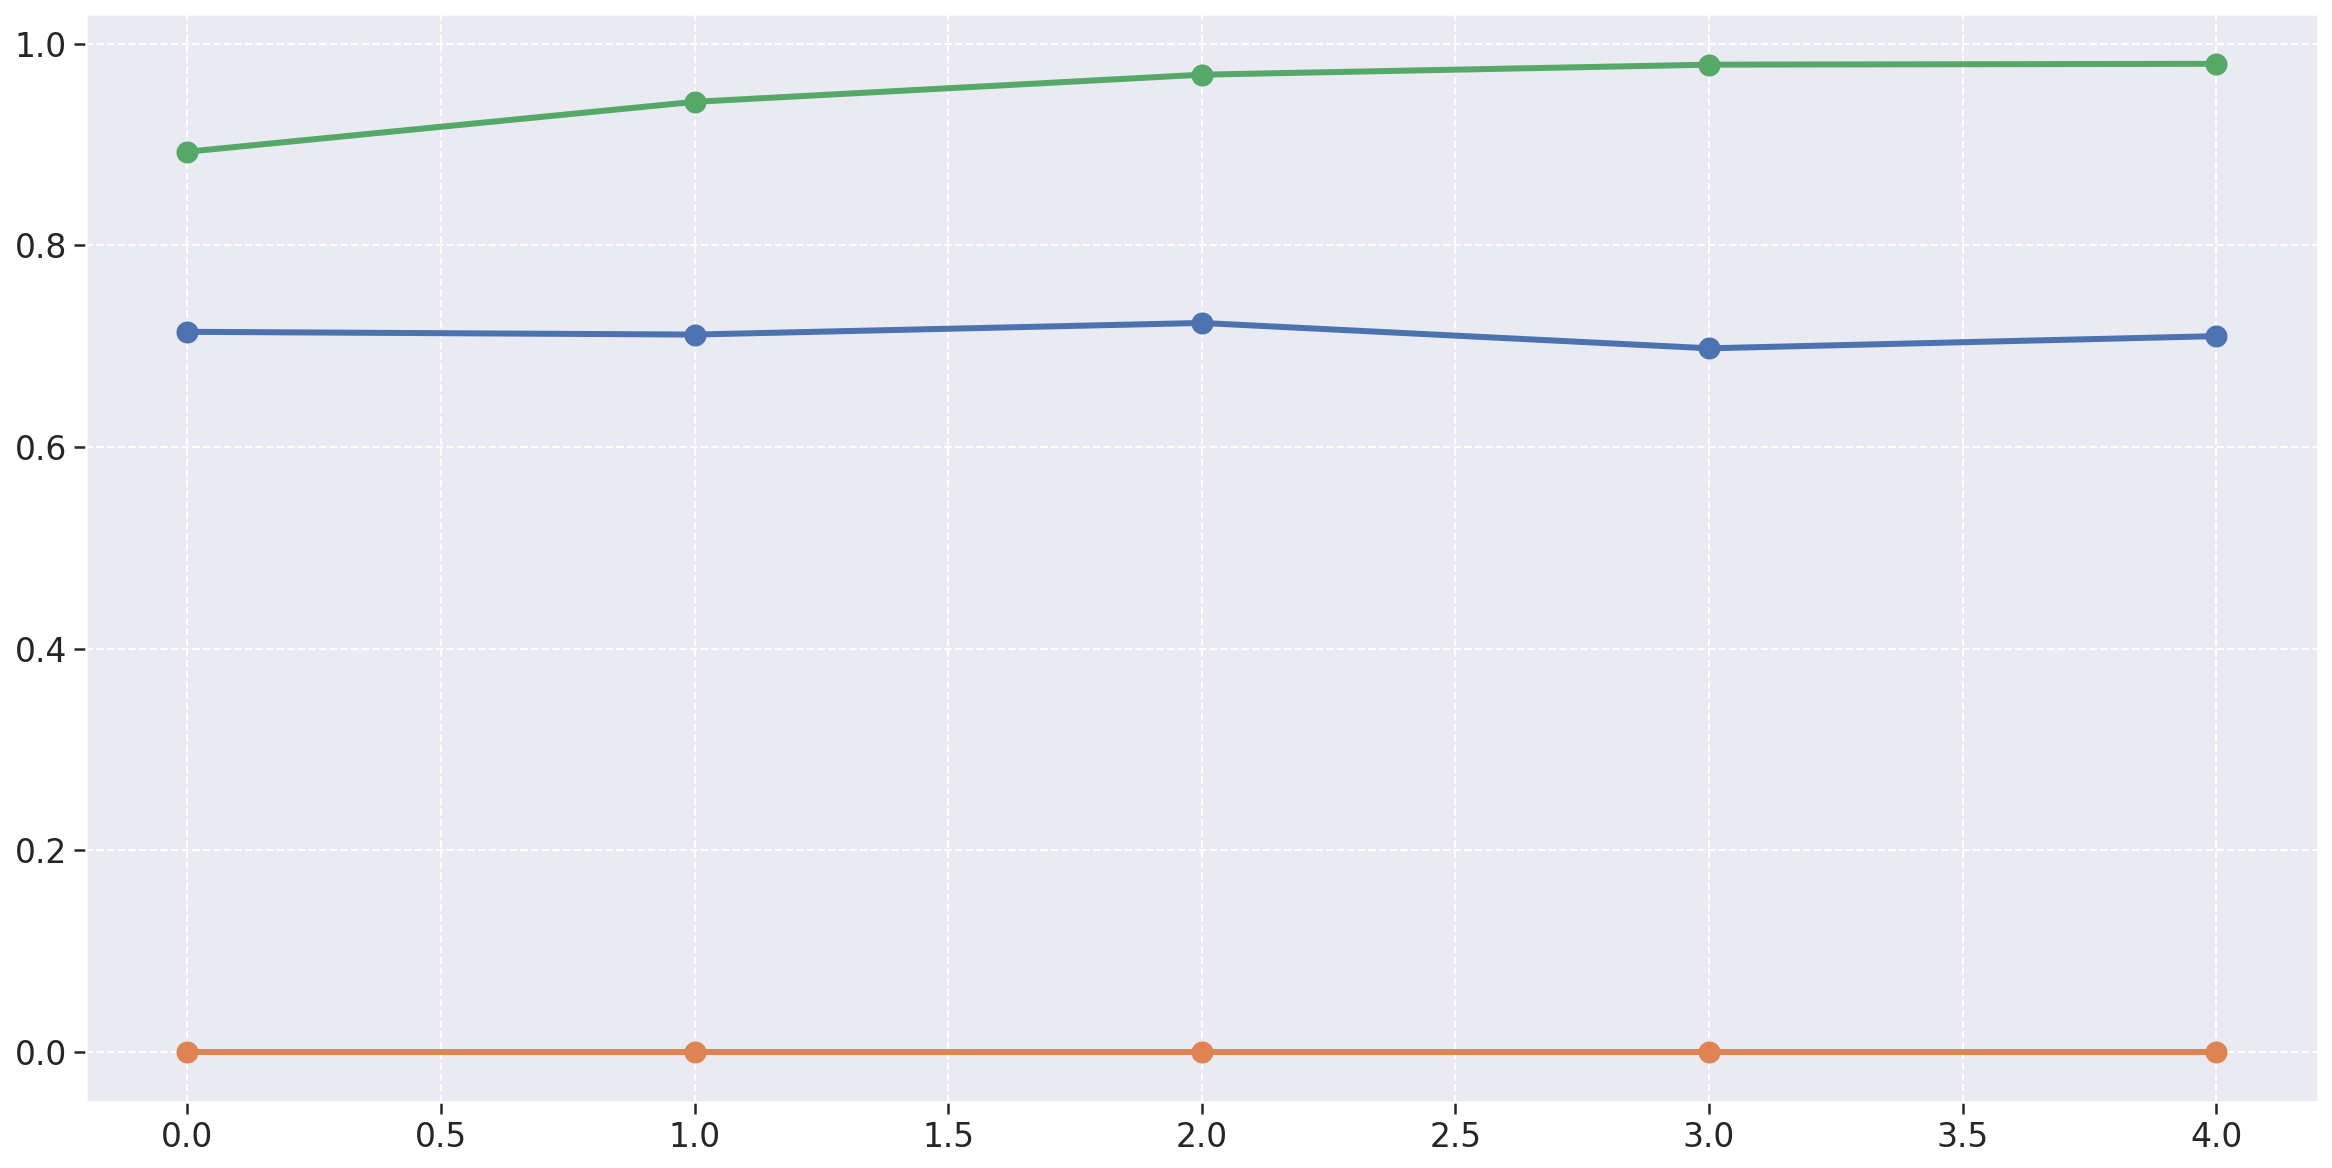

In [217]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Content_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(Content_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(Content_metrics['m3'], linewidth=3, marker='o', markersize=10)

# User

# M1

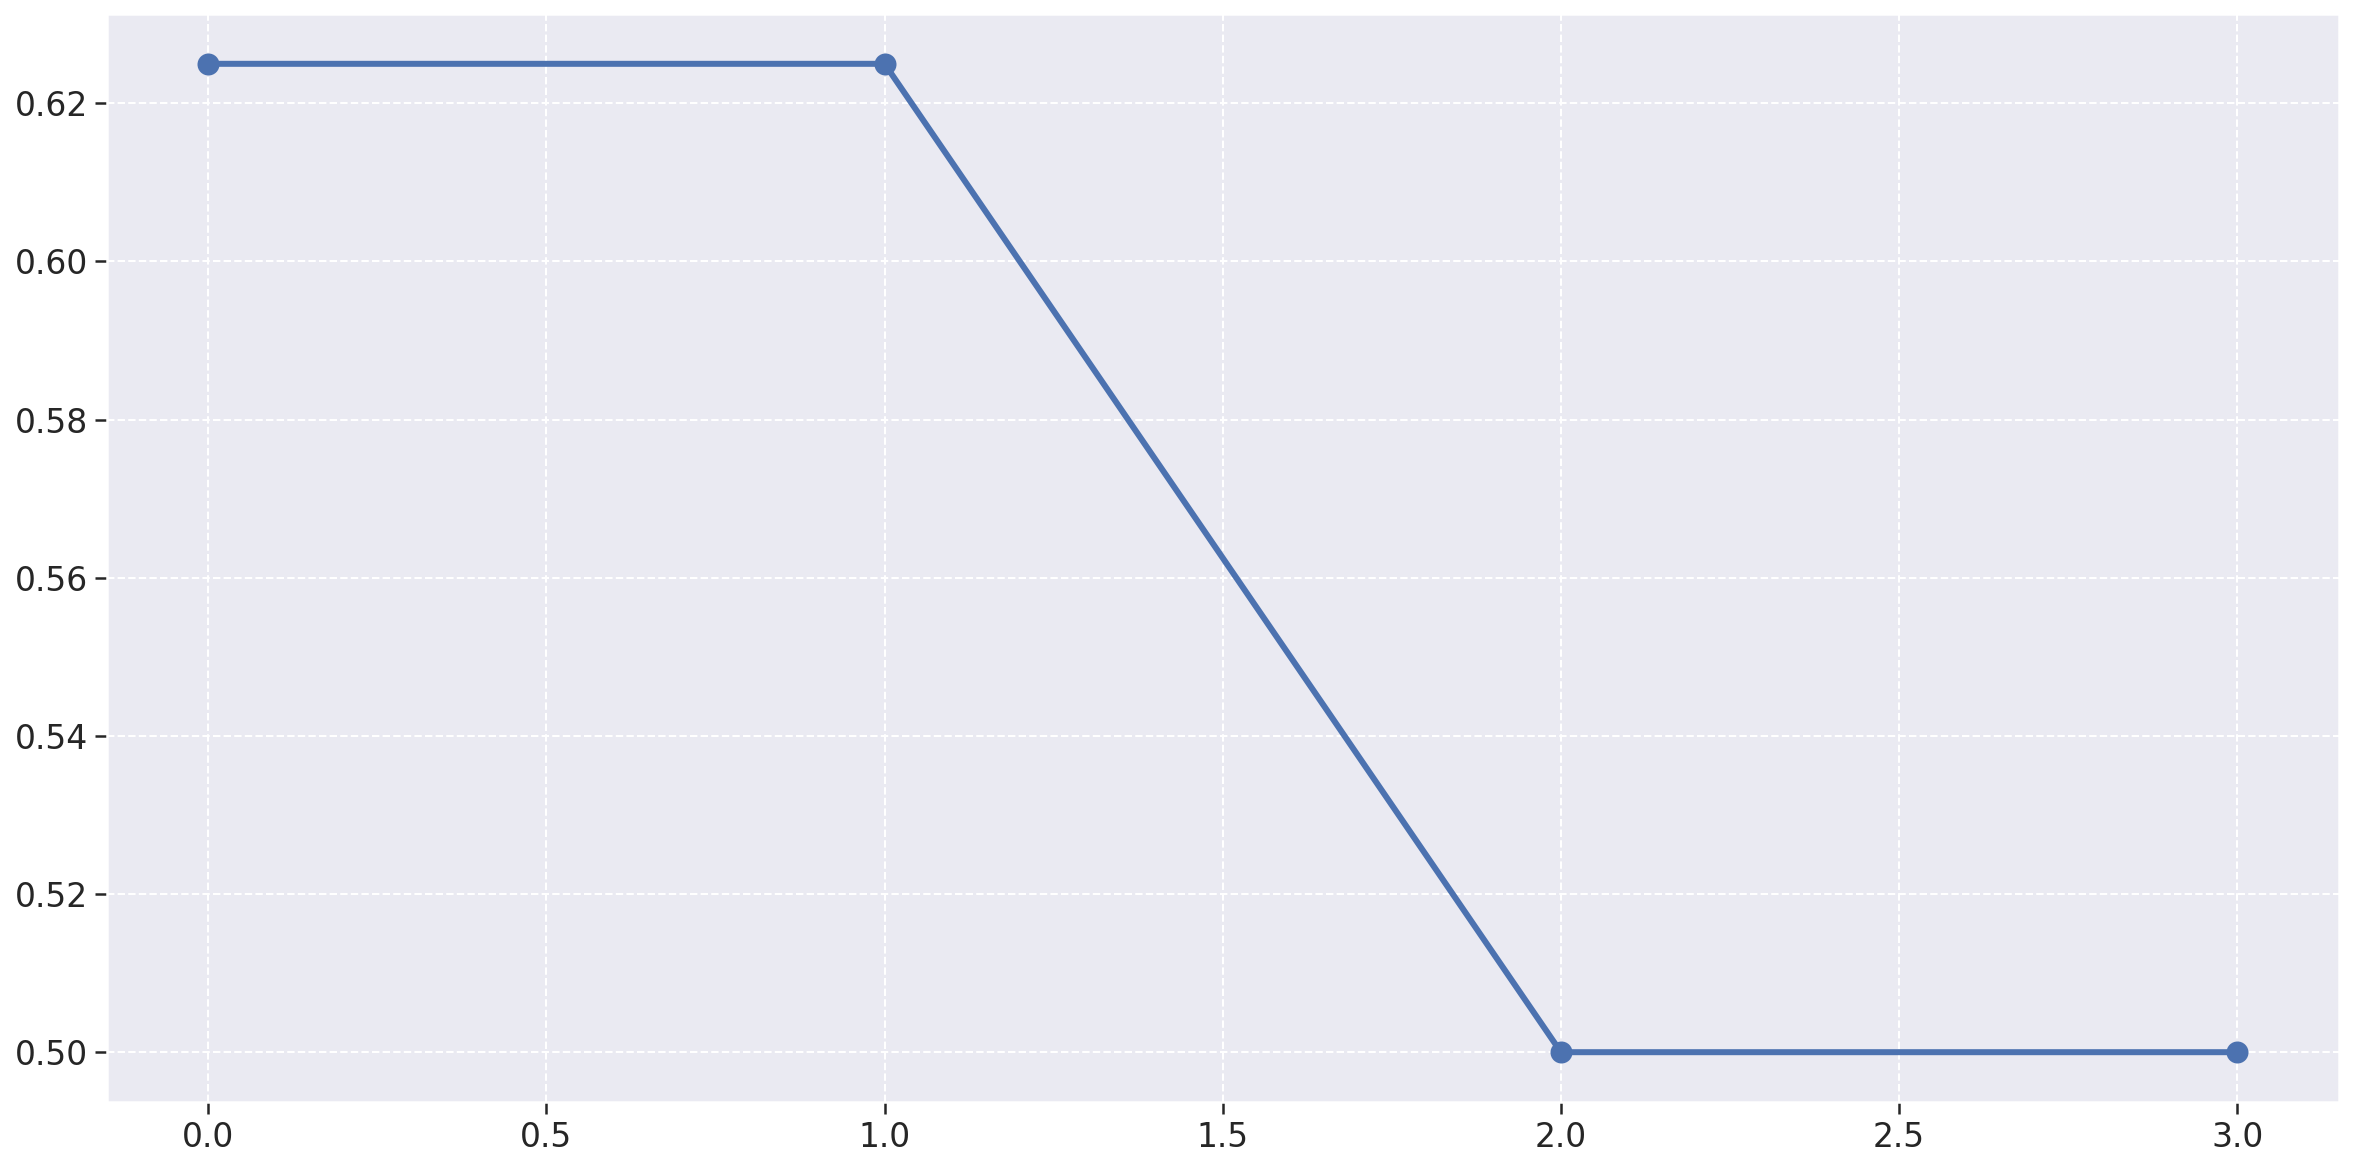

In [291]:
fig = plt.figure(figsize=(20, 10))

plt.plot(User_App_metrics['m1'], linewidth=3, marker='o', markersize=10)

# M2

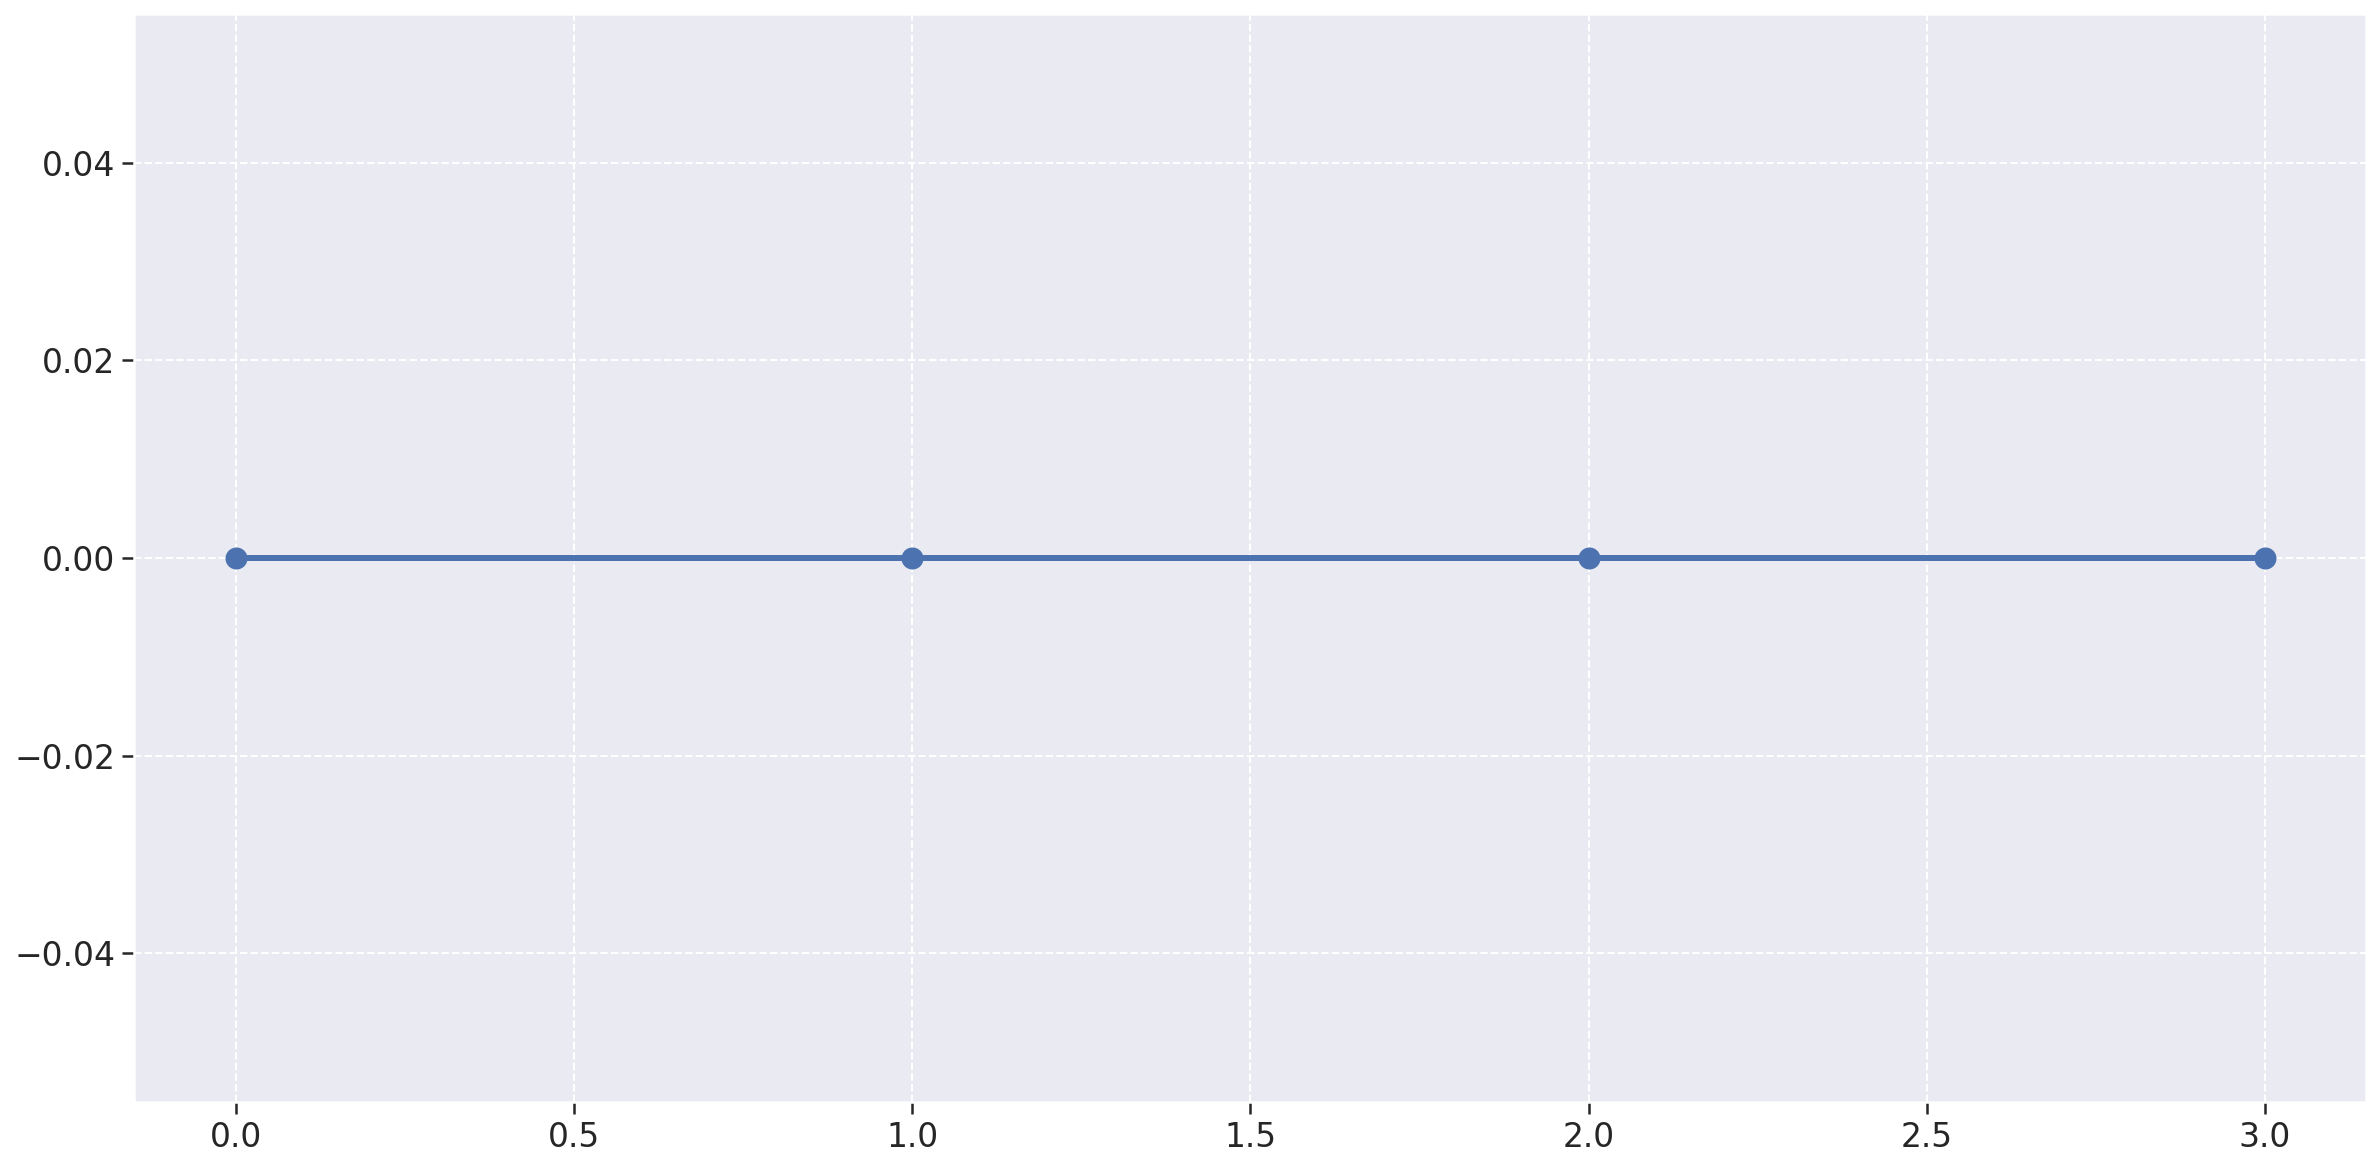

In [292]:
fig = plt.figure(figsize=(20, 10))

plt.plot(User_App_metrics['m2'], linewidth=3, marker='o', markersize=10)

# M3

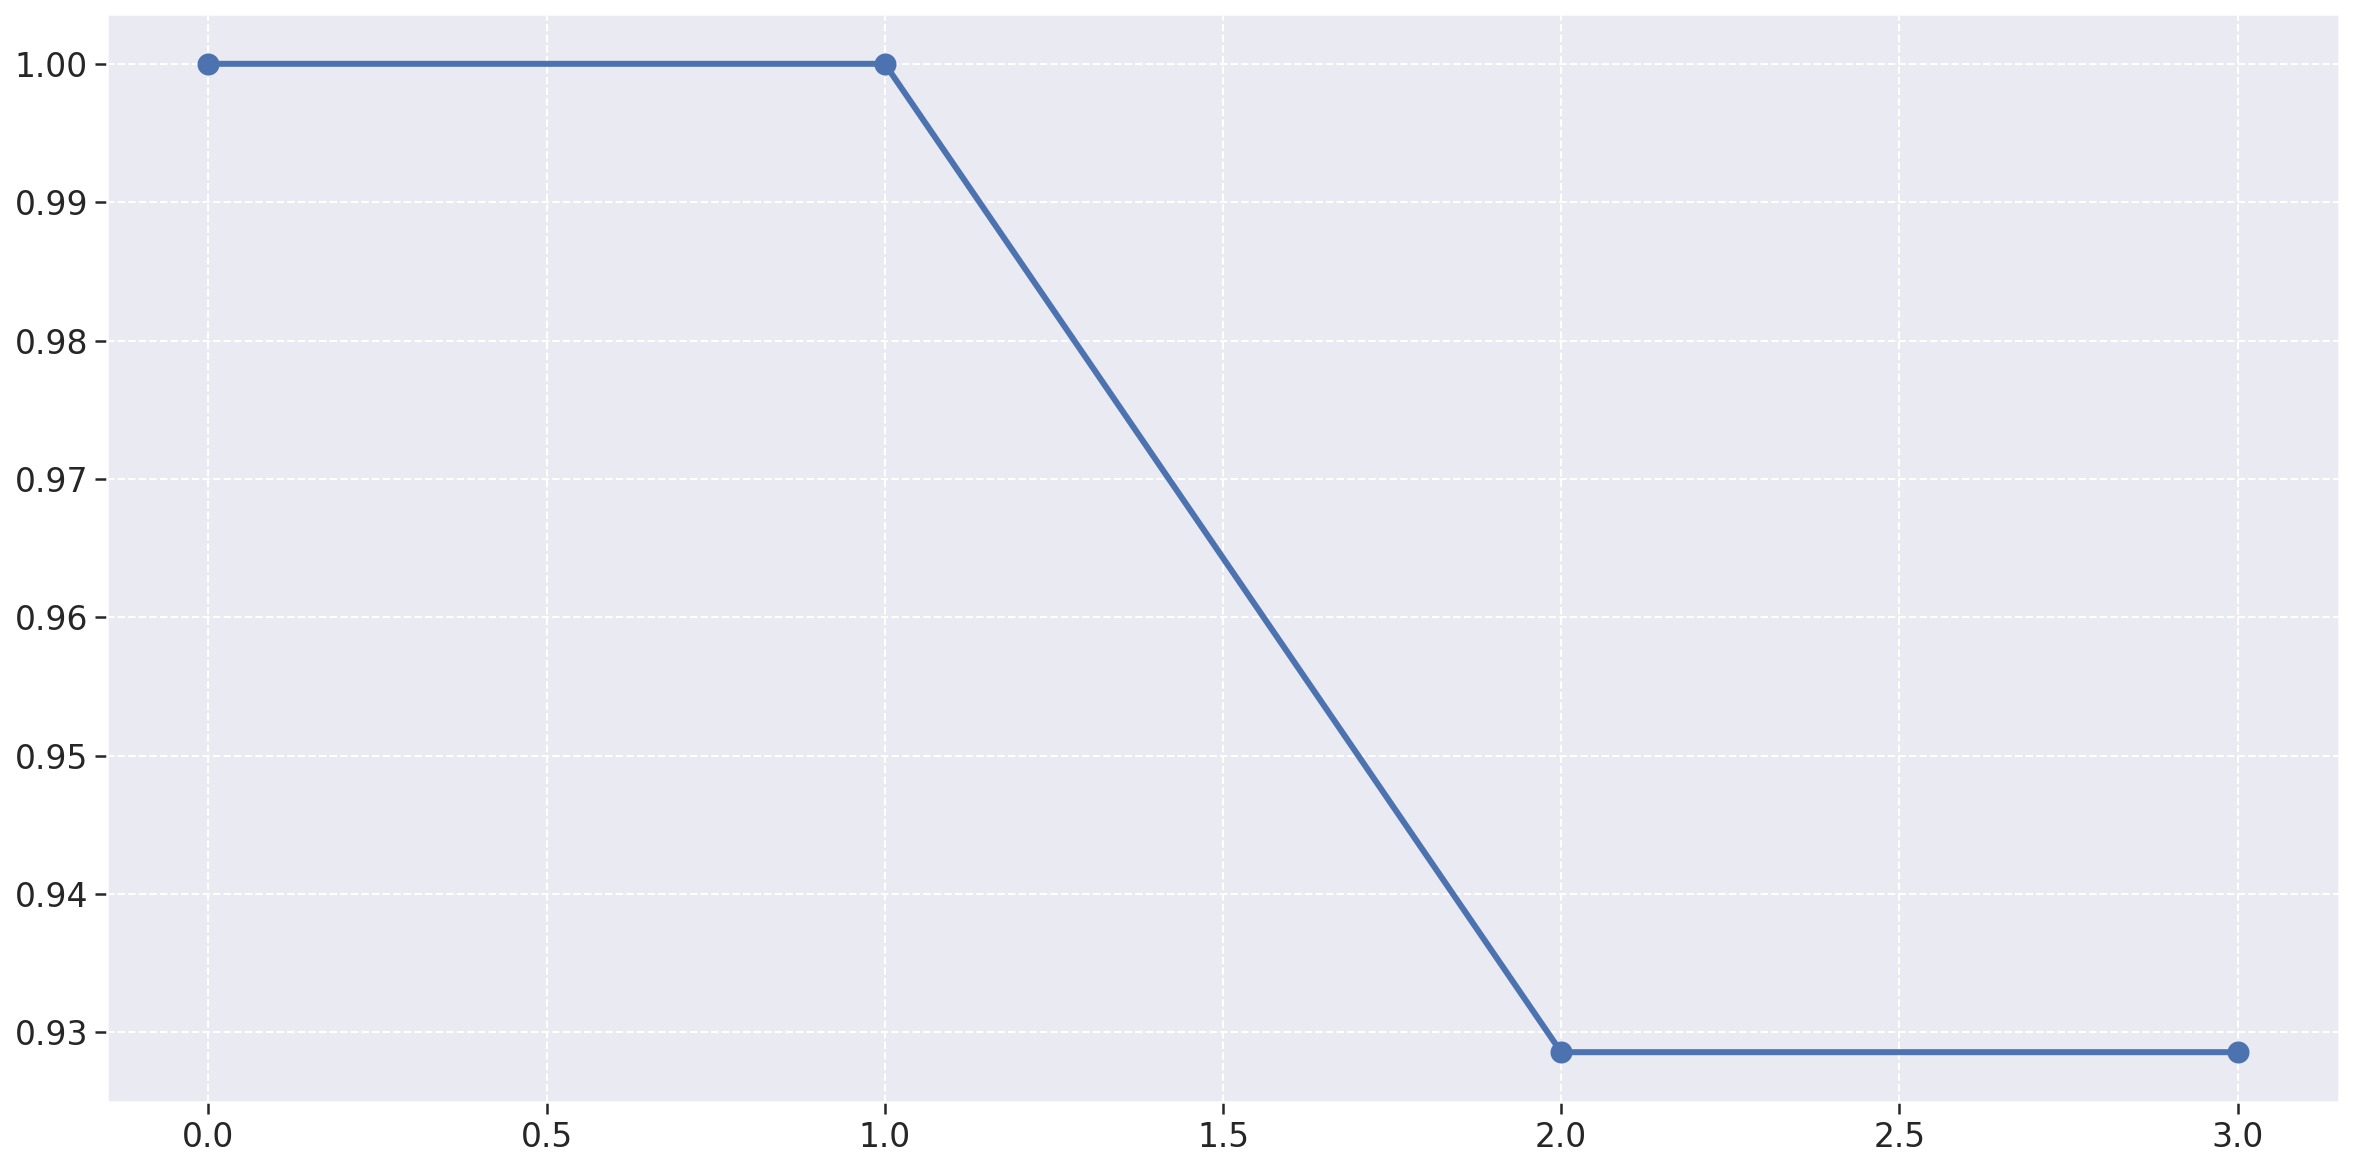

In [293]:
fig = plt.figure(figsize=(20, 10))

plt.plot(User_App_metrics['m3'], linewidth=3, marker='o', markersize=10)

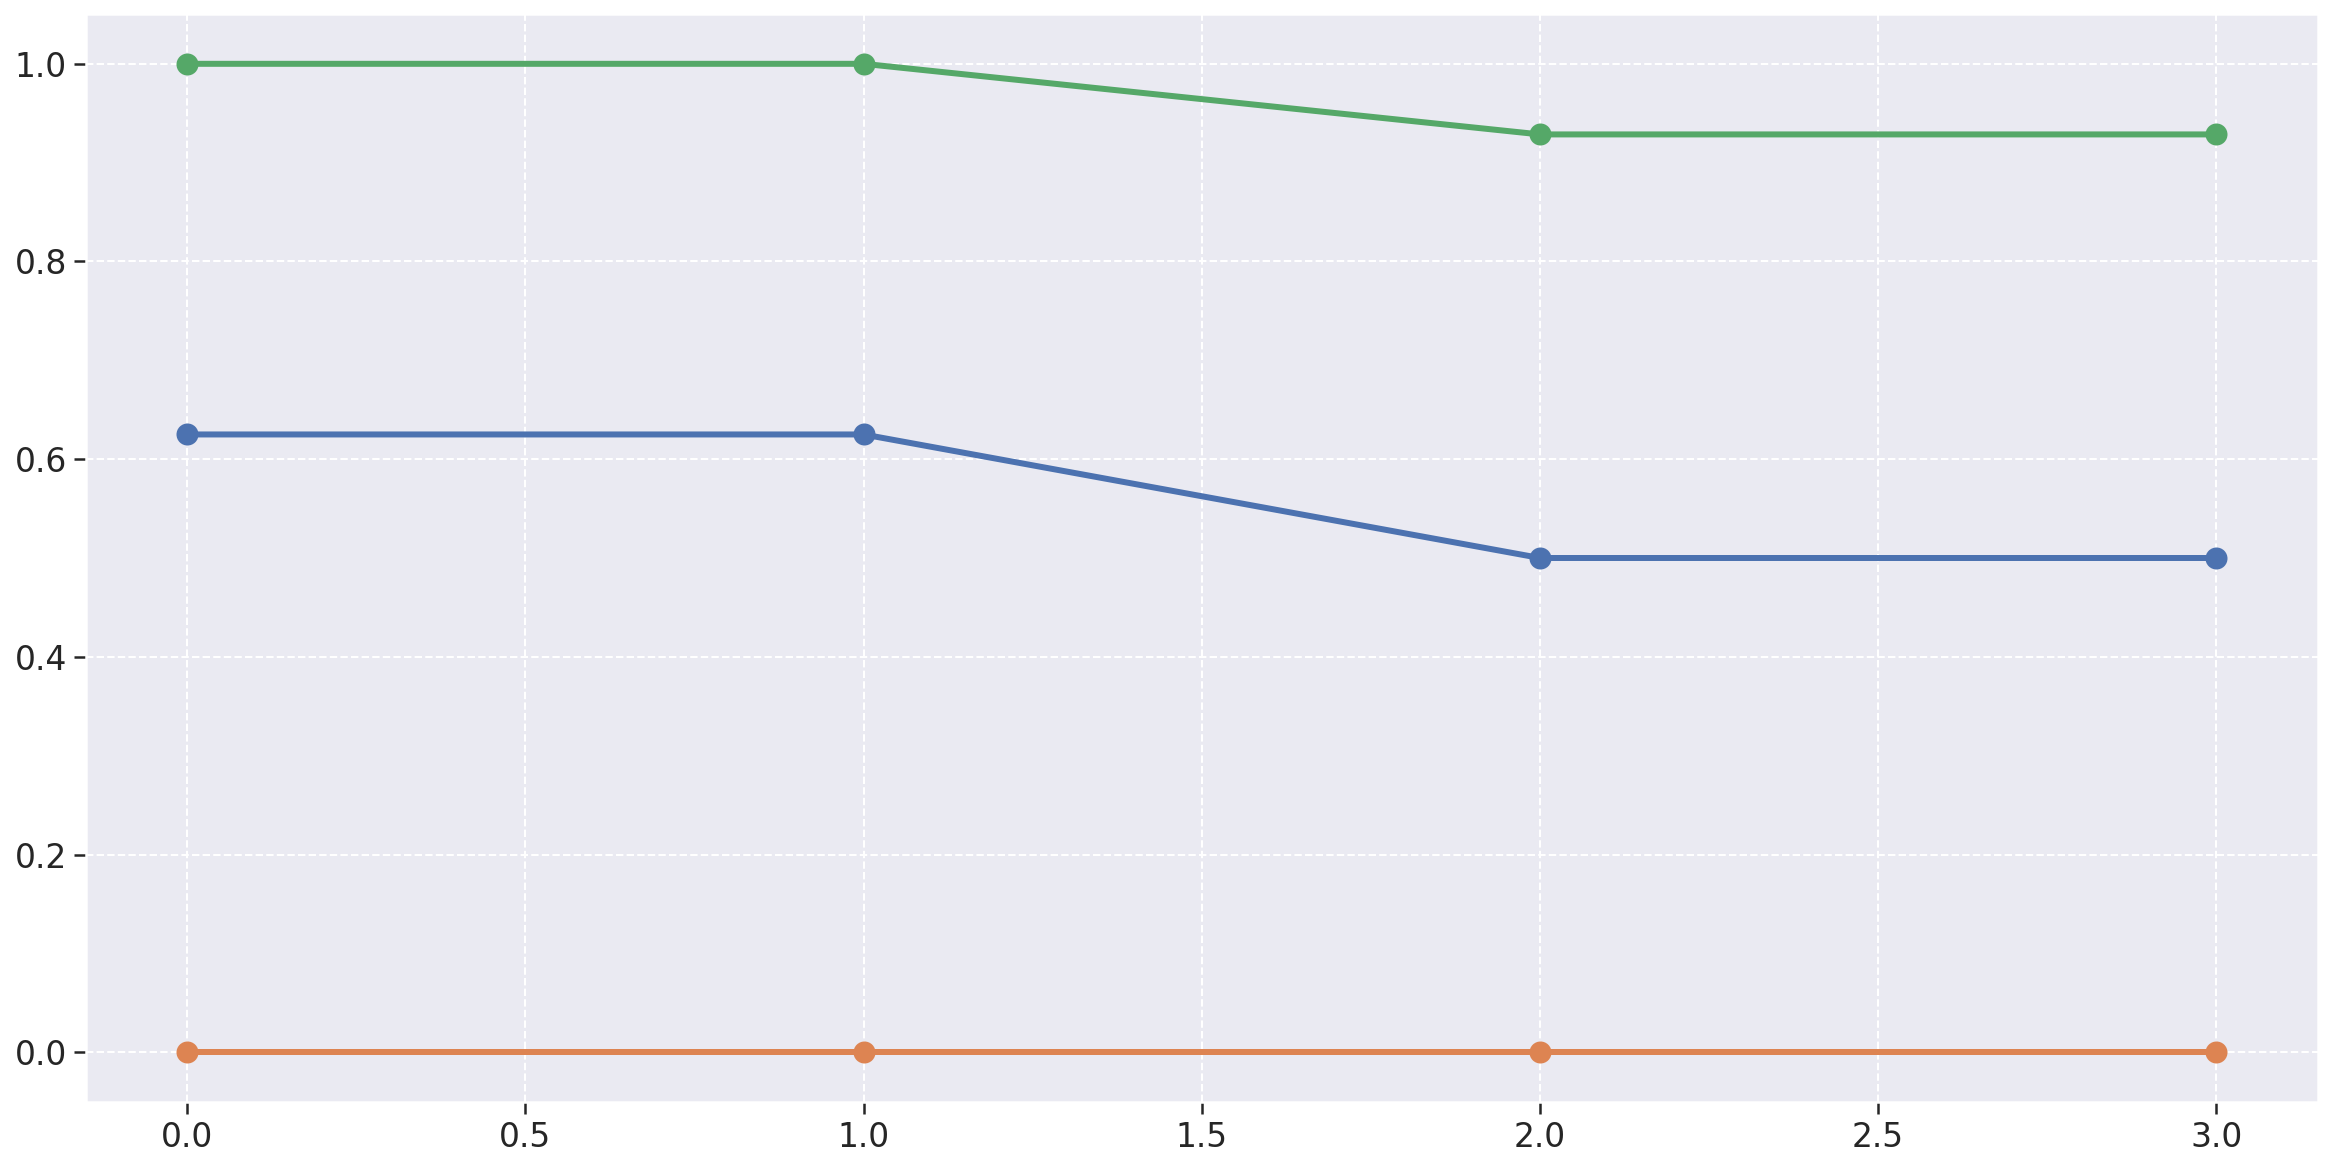

In [294]:
fig = plt.figure(figsize=(20, 10))

plt.plot(User_App_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(User_App_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(User_App_metrics['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [316]:
psc1 = 1
pc = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

Admin_metrics['code_quality'] = ((Admin_metrics['m1']*pm1)+(Admin_metrics['m2']*pm2)+(Admin_metrics['m3']*pm3))*psc1
Content_metrics['code_quality'] = ((Content_metrics['m1']*pm1)+(Content_metrics['m2']*pm2)+(Content_metrics['m3']*pm3))*psc1
Files_metrics['code_quality'] = ((Files_metrics['m1']*pm1)+(Files_metrics['m2']*pm2)+(Files_metrics['m3']*pm3))*psc1
User_App_metrics['code_quality'] = ((User_App_metrics['m1']*pm1)+(User_App_metrics['m2']*pm2)+(User_App_metrics['m3']*pm3))*psc1
Mobile_App_metrics['code_quality'] = ((Mobile_App_metrics['m1']*pm1)+(Mobile_App_metrics['m2']*pm2)+(Mobile_App_metrics['m3']*pm3))*psc1

## Code Quality 

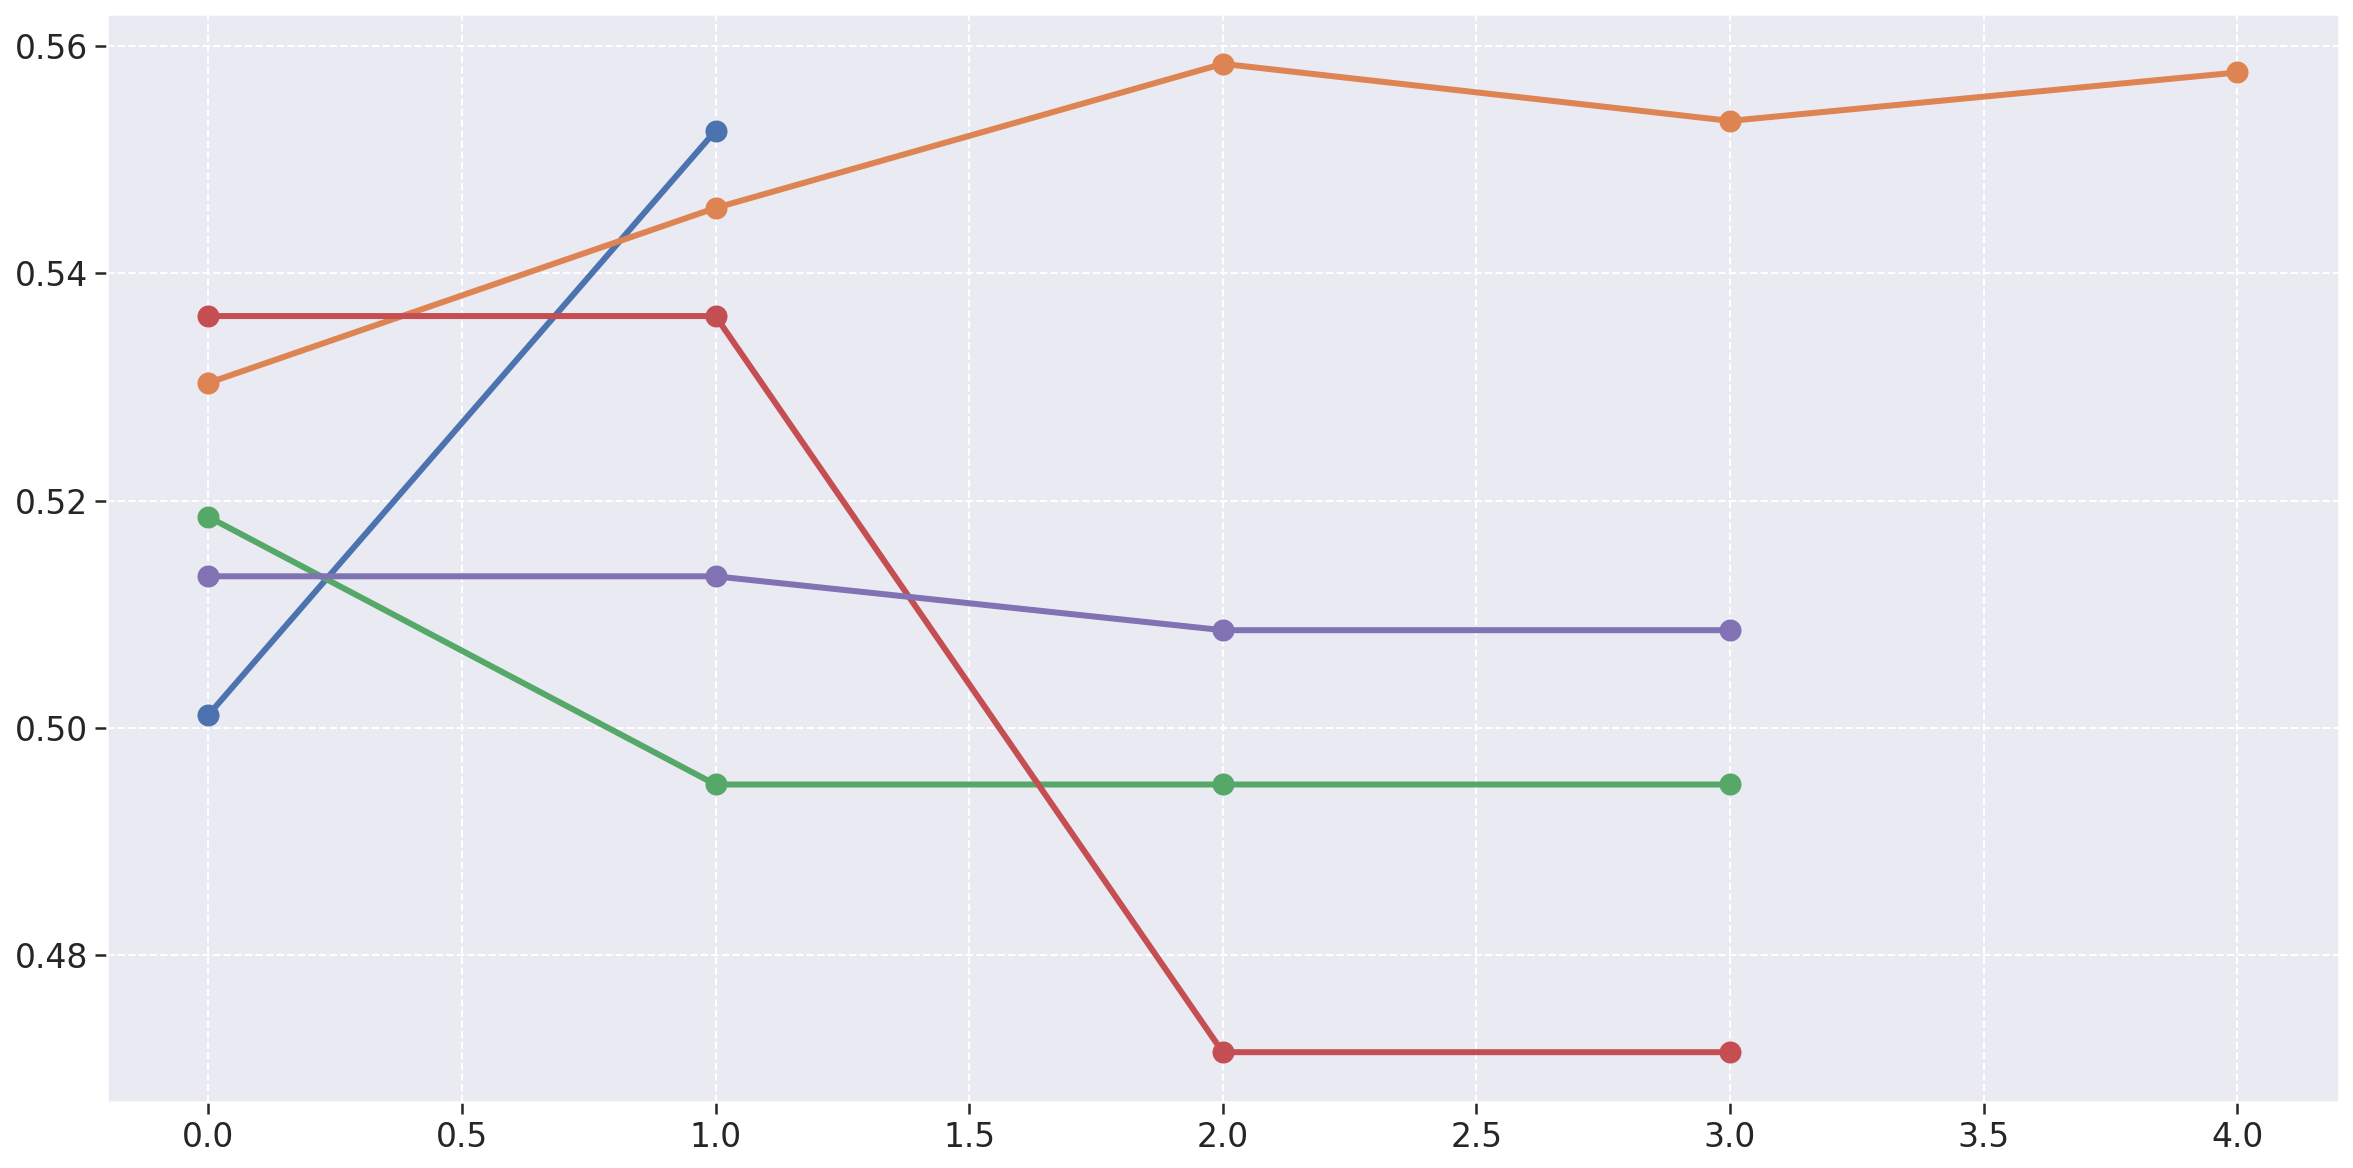

In [318]:
fig = plt.figure(figsize=(20, 10))

plt.plot(Admin_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(Content_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(Files_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(User_App_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(Mobile_App_metrics['code_quality'], linewidth=3, marker='o', markersize=10)

## All Metrics

In [319]:
metrics_df = pd.concat([Admin_metrics, Content_metrics, Files_metrics, User_App_metrics, Mobile_App_metrics], ignore_index=True)

metrics_df['maintainability'] = metrics_df['code_quality'] * pc
metrics_df['total'] = metrics_df['maintainability'] * pc

In [320]:
metrics_df

,m1,m2,m3,repository,version,code_quality,maintainability,total
0,0.518519,0.0,1.000000,Admin,2021-10-18-01.33,0.501111,0.501111,0.501111
1,0.674419,0.0,1.000000,Admin,2021-11-04-00.35,0.552558,0.552558,0.552558
2,0.714286,0.0,0.892857,Content,2021-09-14-03:28,0.530357,0.530357,0.530357
3,0.711538,0.0,0.942308,Content,2021-09-27-03.22,0.545769,0.545769,0.545769
4,0.723077,0.0,0.969231,Content,2021-10-06-19.24,0.558462,0.558462,0.558462
5,0.697917,0.0,0.979167,Content,2021-10-19-18.48,0.553438,0.553438,0.553438
6,0.710000,0.0,0.980000,Content,2021-11-03-22:59,0.557700,0.557700,0.557700
7,0.571429,0.0,1.000000,Files,2021-09-14-03:28,0.518571,0.518571,0.518571
8,0.500000,0.0,1.000000,Files,2021-10-15-19.42,0.495000,0.495000,0.495000
9,0.500000,0.0,1.000000,Files,2021-10-15-20.05,0.495000,0.495000,0.495000


(0.4, 0.7)

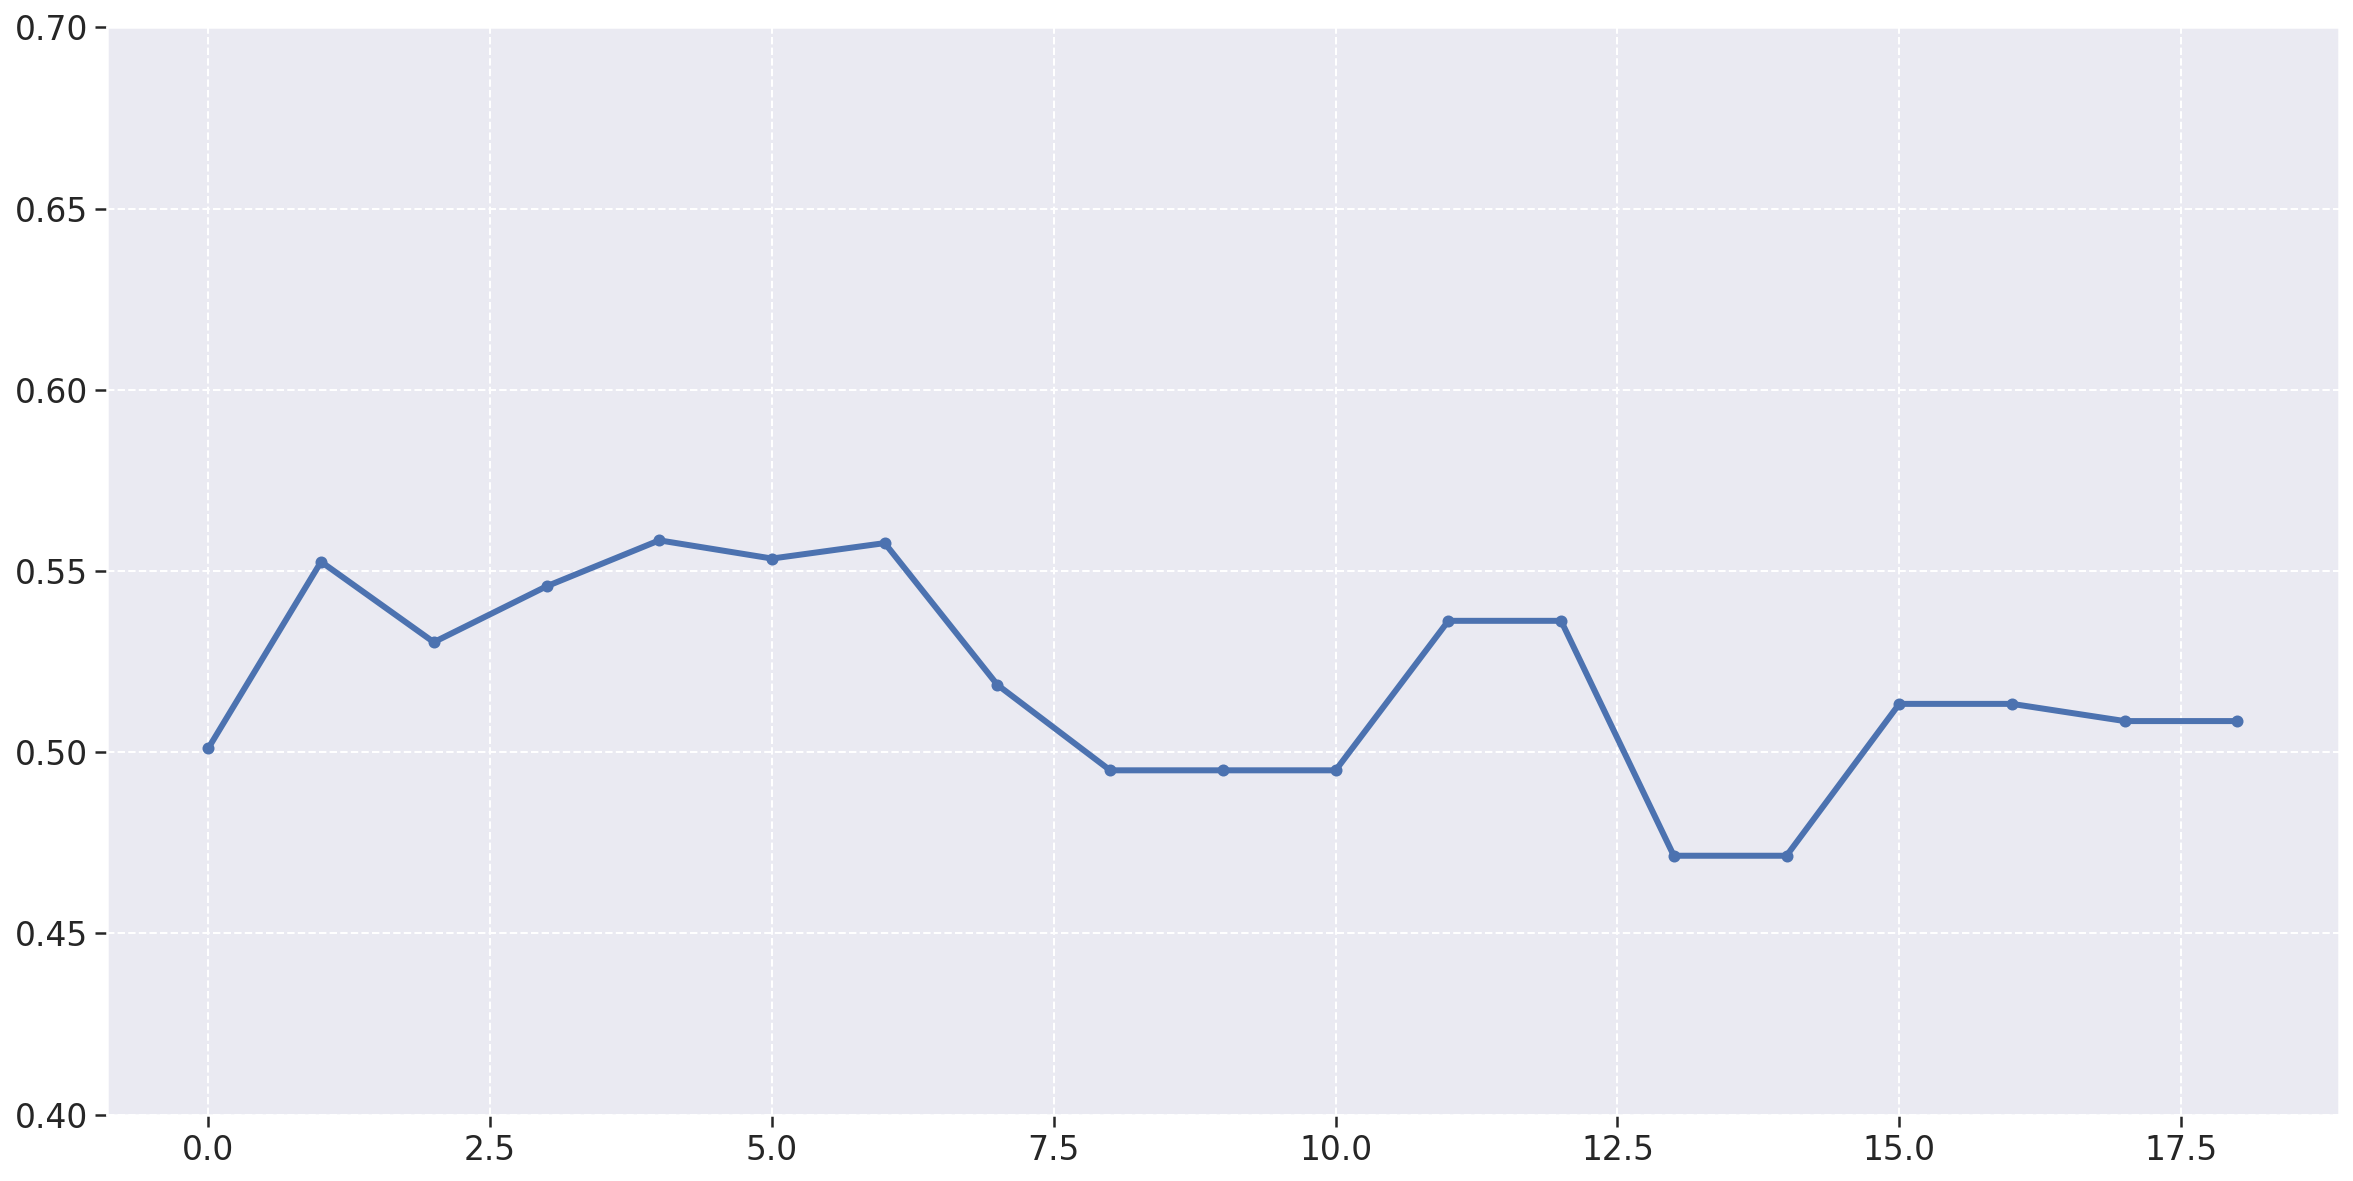

In [321]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5)

plt.ylim(.4,.7)

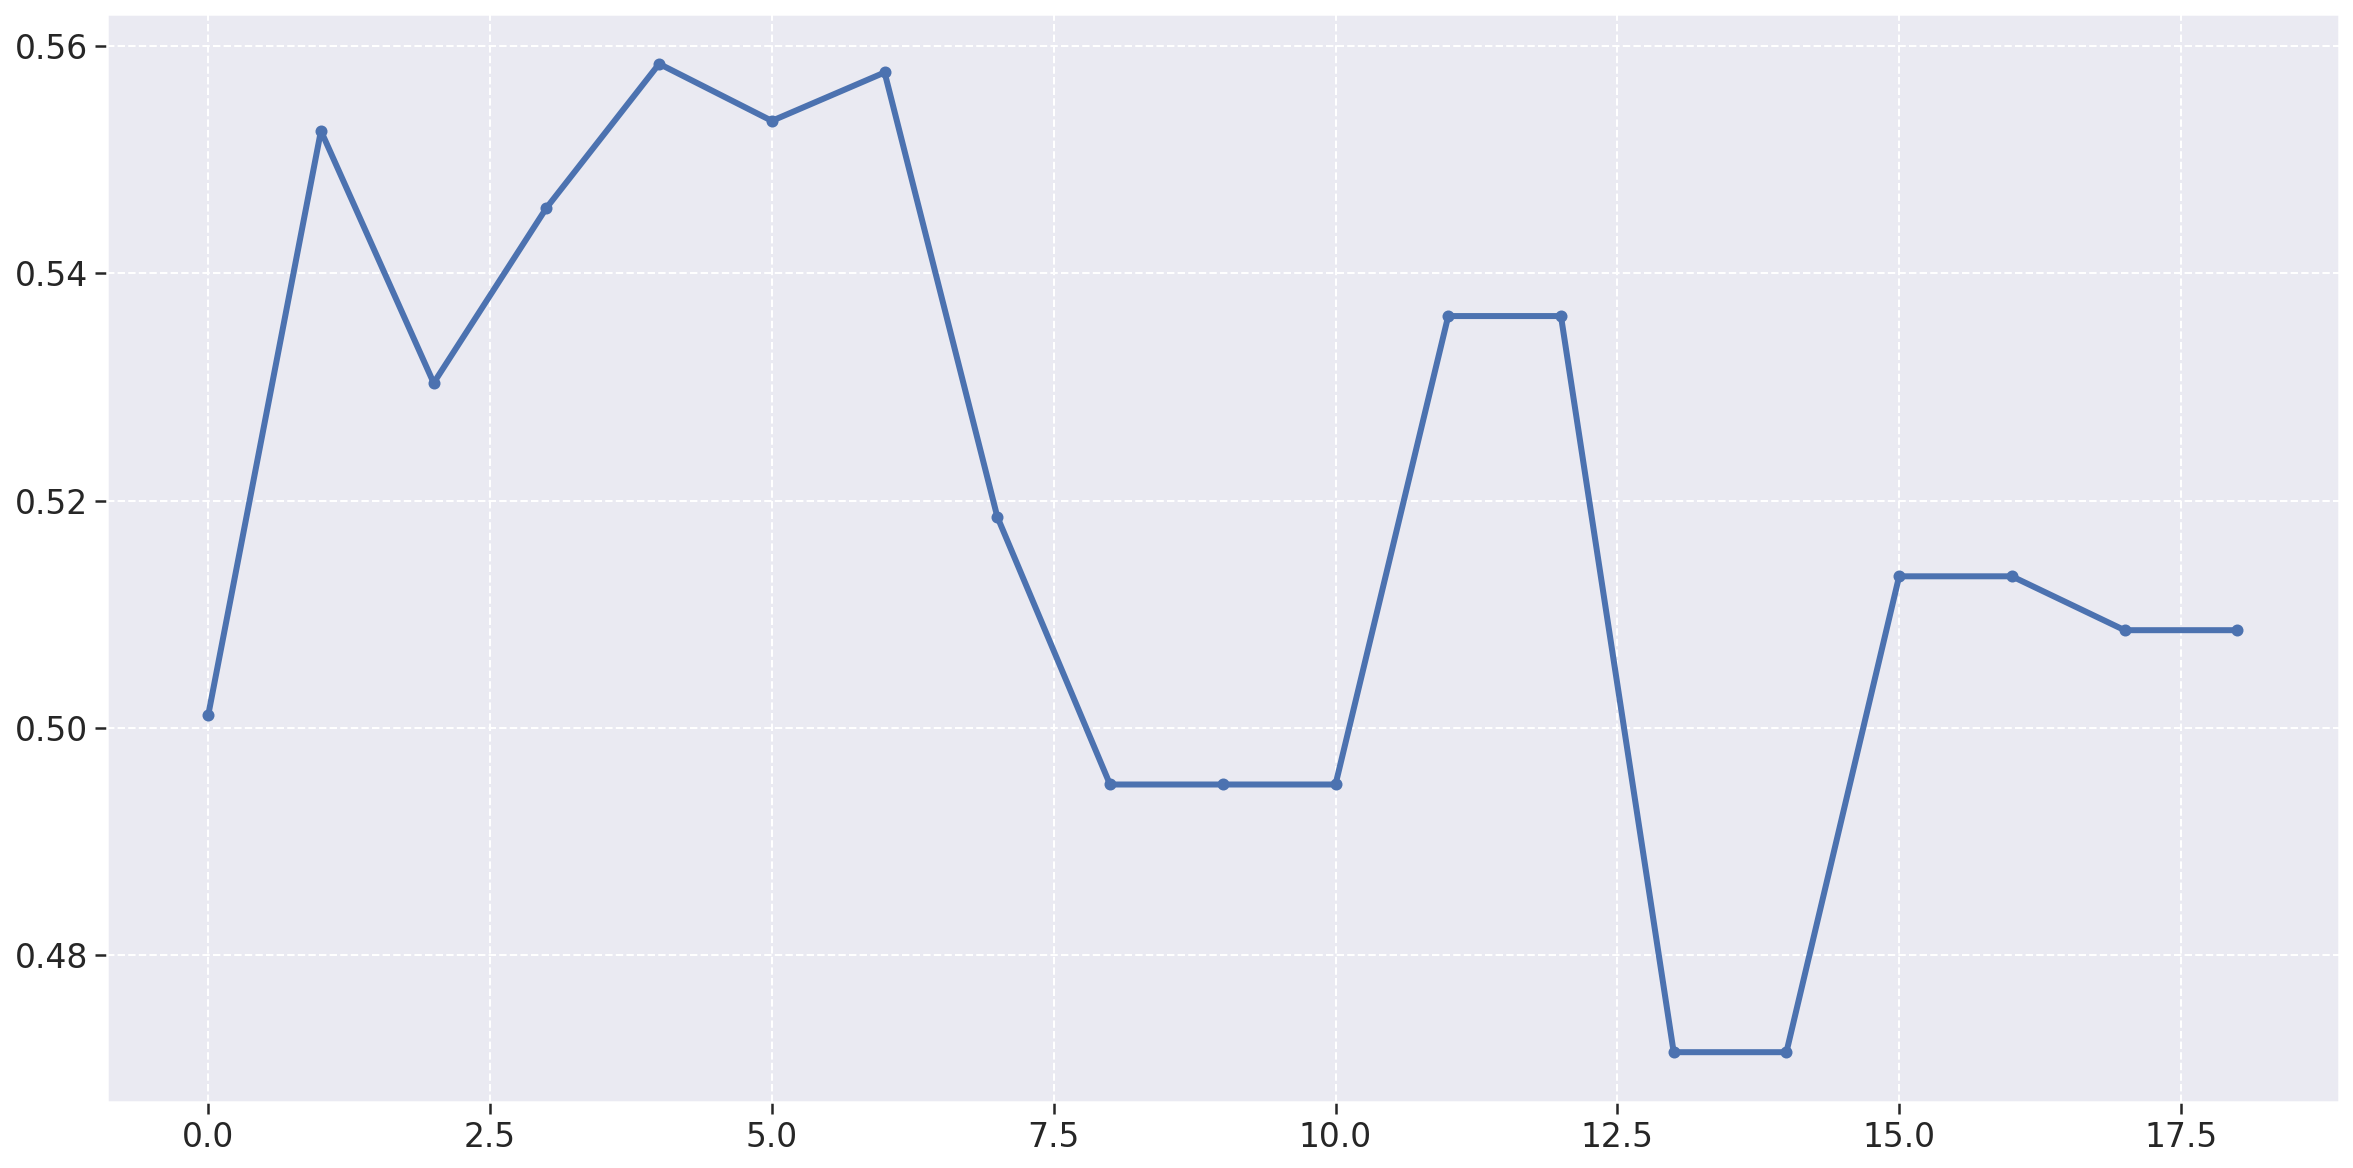

In [327]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)

# plt.ylim(.4,.7)

# Metrics to file

In [331]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

['data', 'analytics.ipynb', 'requirements.txt', '.ipynb_checkpoints']


In [332]:
now = datetime.now()
now_str = now.strftime("%d-%m-%Y-%H-%M")

metrics_df.to_csv('./data/fga-eps-mds-fga-eps-mds-2021.1-Multilind-qualidade-total-produto-{}.csv'.format(now_str), index = False)